Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


<Figure size 432x288 with 0 Axes>

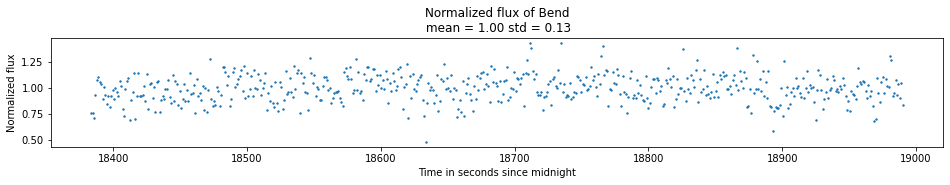

<Figure size 432x288 with 0 Axes>

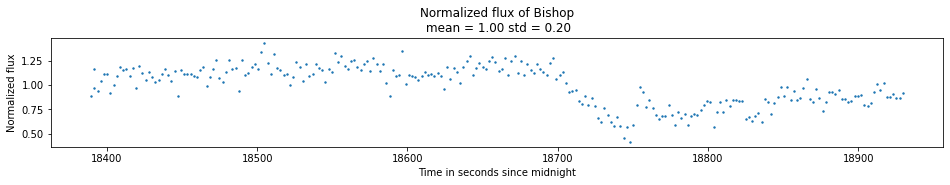

<Figure size 432x288 with 0 Axes>

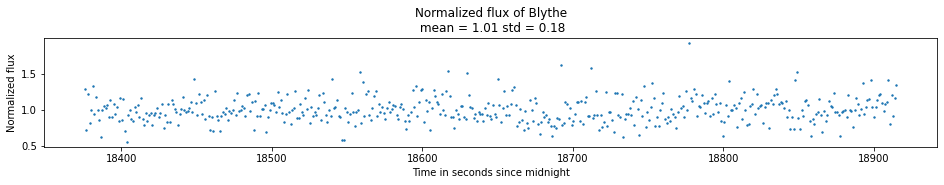

<Figure size 432x288 with 0 Axes>

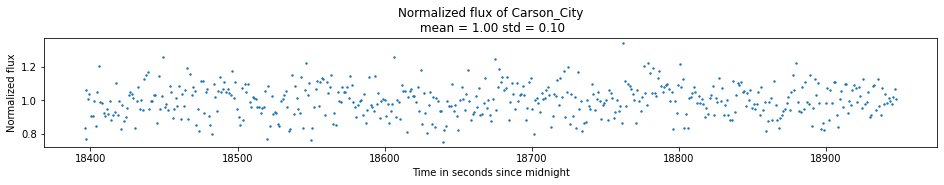

<Figure size 432x288 with 0 Axes>

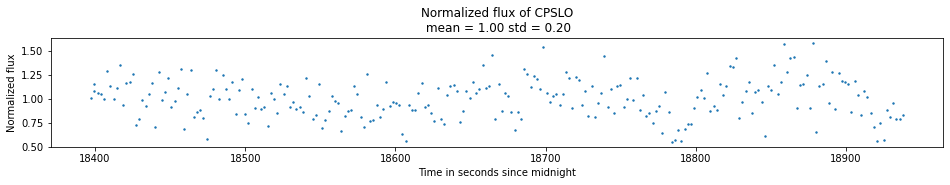

<Figure size 432x288 with 0 Axes>

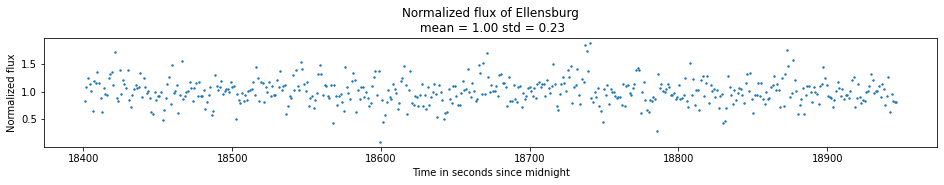

<Figure size 432x288 with 0 Axes>

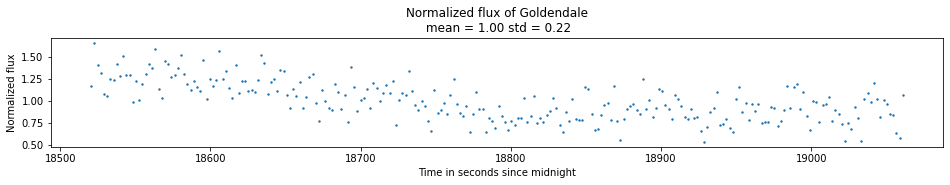

<Figure size 432x288 with 0 Axes>

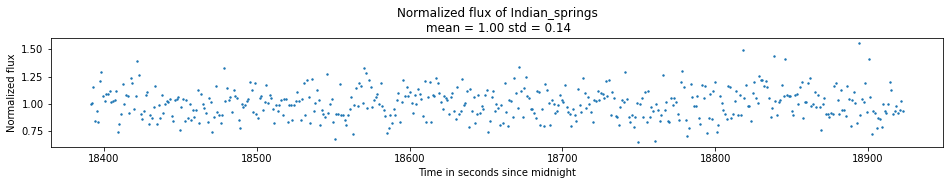

<Figure size 432x288 with 0 Axes>

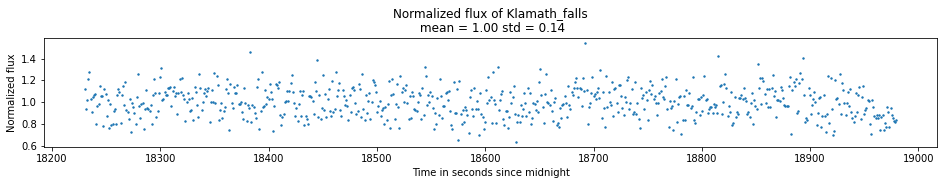

<Figure size 432x288 with 0 Axes>

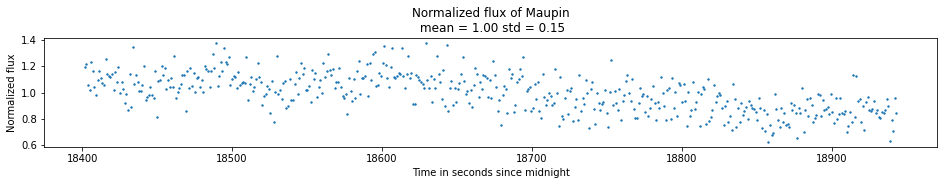

<Figure size 432x288 with 0 Axes>

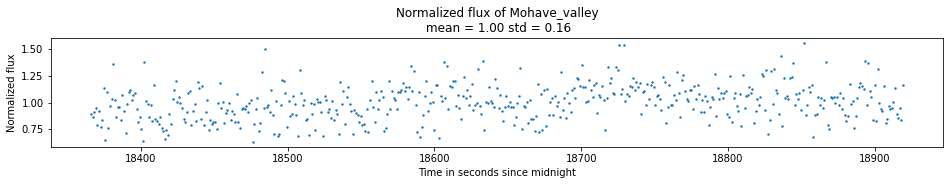

<Figure size 432x288 with 0 Axes>

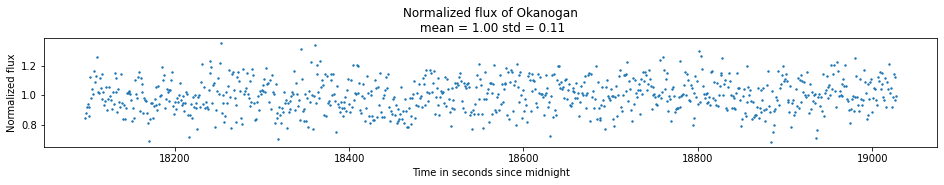

<Figure size 432x288 with 0 Axes>

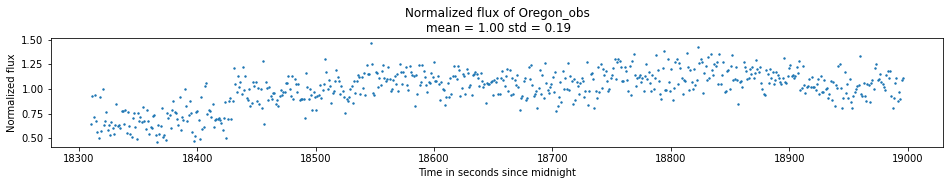

<Figure size 432x288 with 0 Axes>

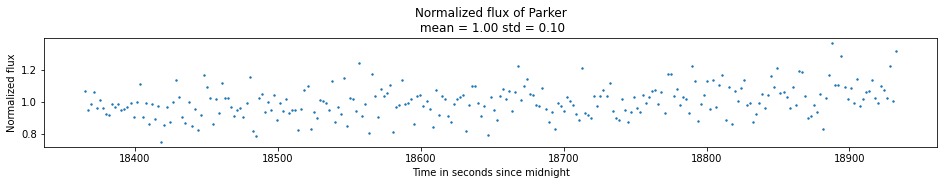

<Figure size 432x288 with 0 Axes>

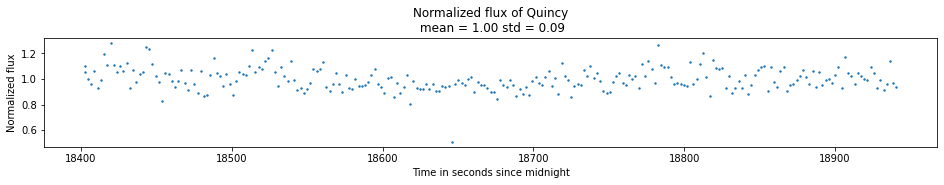

<Figure size 432x288 with 0 Axes>

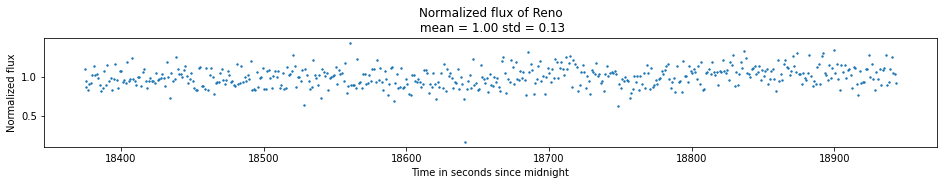

<Figure size 432x288 with 0 Axes>

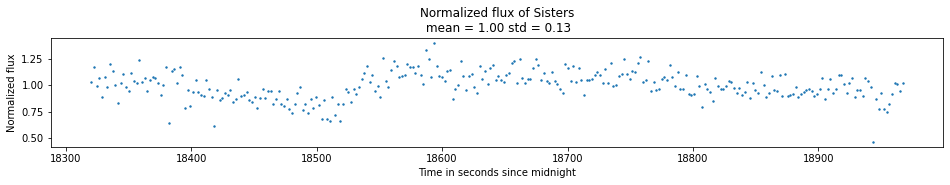

Mean < std in Susanville location


<Figure size 432x288 with 0 Axes>

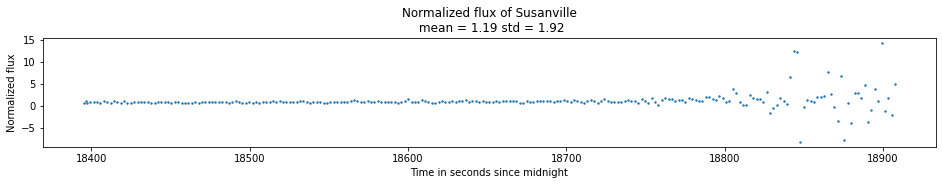

Mean < std in Wildwood location


<Figure size 432x288 with 0 Axes>

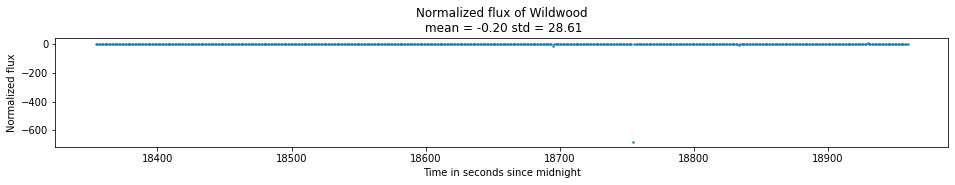

<Figure size 432x288 with 0 Axes>

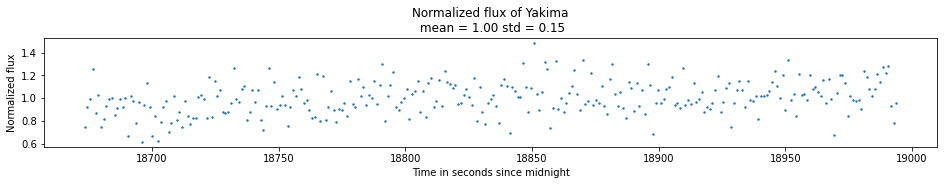

<Figure size 432x288 with 0 Axes>

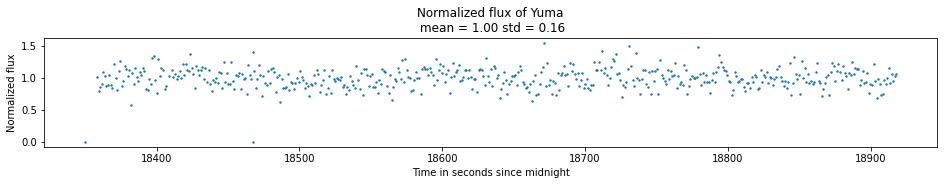

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def is_float(string):
    """ True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False

!pip install zipfile
from zipfile import ZipFile
archivos = ZipFile('lc_20190128_2014YY49-original.zip', 'r')
# archivos = np.load('lc_20190128_2014YY49.zip')
archivos.extractall()

size = (16, 2)

namelist = ['20190128_Bend.dat',
 '20190128_Bishop.dat',
 '20190128_Blythe.dat',
 '20190128_Carson_City.dat',
 '20190128_CPSLO.dat',
 '20190128_Ellensburg.dat',
 '20190128_Goldendale.dat',
 '20190128_Indian_springs.dat',
 '20190128_Klamath_falls.dat',
 '20190128_Maupin.dat',
 '20190128_Mohave_valley.dat',
 '20190128_Okanogan.dat',
 '20190128_Oregon_obs.dat',
 '20190128_Parker.dat',
 '20190128_Quincy.dat',
 '20190128_Reno.dat',
 '20190128_Sisters.dat',
 '20190128_Susanville.dat',
 '20190128_Wildwood.dat',
 '20190128_Yakima.dat',
 '20190128_Yuma.dat']

mean_less_than_std = []

for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]
  # for i in flux_unc:
  #   print(i)
  #   if flux_unc[i].isdigit() == False:  # si es que hay un string '****'
  #     mean = np.mean(flux_norm)
  #     std = np.std(flux_norm)
  #     plt.clf()
  #     plt.errorbar(time, flux_norm)
  #     plt.xlabel("Time in seconds since midnight")
  #     plt.ylabel("Normalized flux")
  #     plt.title(str(file)[:-4]+'\n mean: {:.2f}'.format(mean)+' std: {:.2f}'.format(std))
  #     plt.show()
  for i in range(len(flux_norm)): 
    if np.abs(flux_norm[i] - np.mean(flux_norm)) > 1*np.std(flux_norm[i]): # si es que un dato se pasa de 1σ (y comparado con datos vecinos)
      pass
  mean = np.mean(flux_norm)
  std = np.std(flux_norm)
  plt.clf()
  plt.figure(figsize=size)
  # plt.errorbar(time, flux_norm, yerr=flux_unc, ecolor='orange')
  plt.scatter(time, flux_norm, s=2)
  if mean < std:
    print('Mean < std in '+str(file)[9:-4]+' location')
    mean_less_than_std.append(str(file)[9:-4])
  plt.xlabel("Time in seconds since midnight")
  plt.ylabel("Normalized flux")
  plt.title('Normalized flux of '+str(file)[9:-4]+'\n mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std))
  plt.show()


# flux_unc = data[:, 2]
# plt.errorbar(time, flux_norm, yerr=flux_unc, ecolor='orange')

# https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy

In [ ]:
mean_less_than_std

['Susanville', 'Wildwood']

<Figure size 432x288 with 0 Axes>

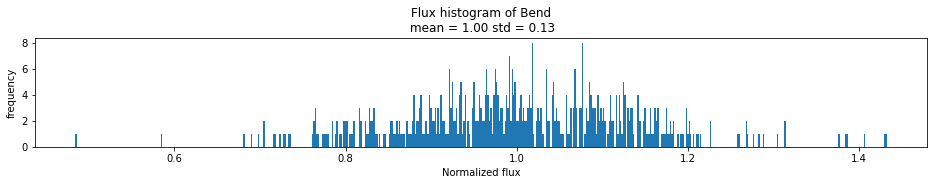

<Figure size 432x288 with 0 Axes>

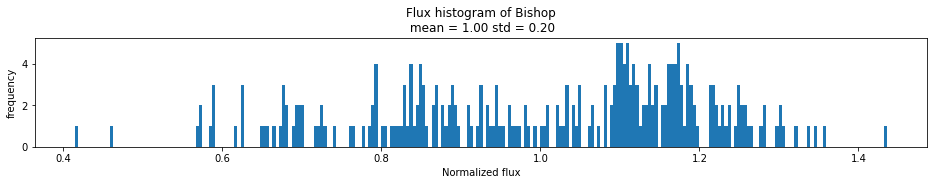

<Figure size 432x288 with 0 Axes>

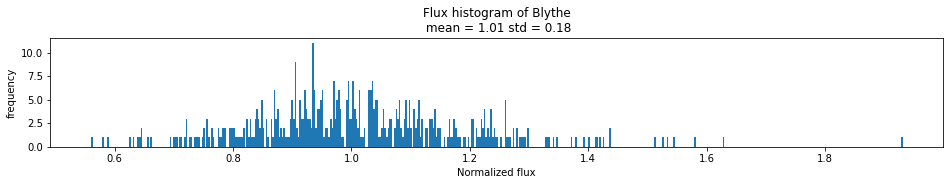

<Figure size 432x288 with 0 Axes>

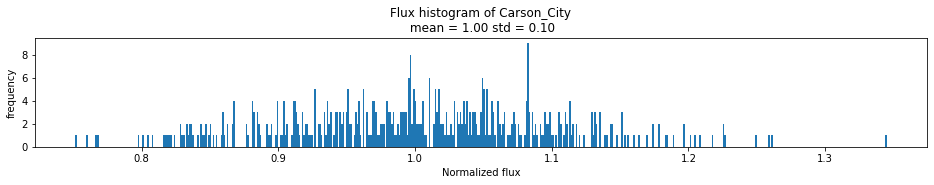

<Figure size 432x288 with 0 Axes>

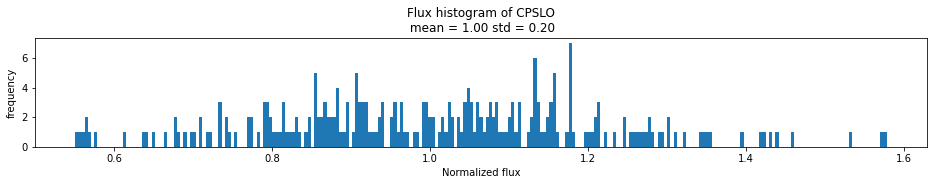

<Figure size 432x288 with 0 Axes>

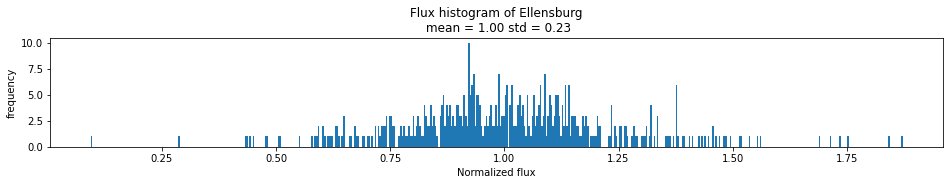

<Figure size 432x288 with 0 Axes>

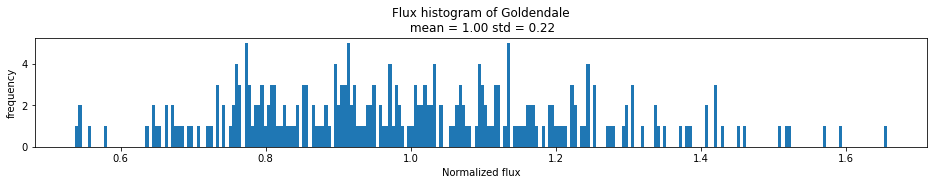

<Figure size 432x288 with 0 Axes>

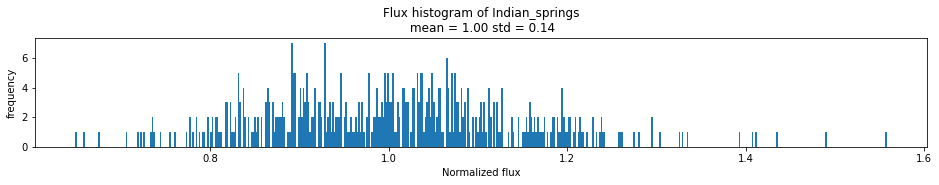

<Figure size 432x288 with 0 Axes>

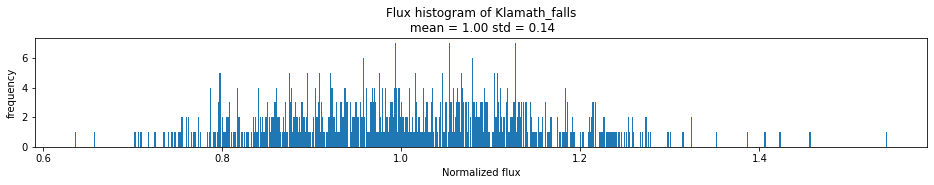

<Figure size 432x288 with 0 Axes>

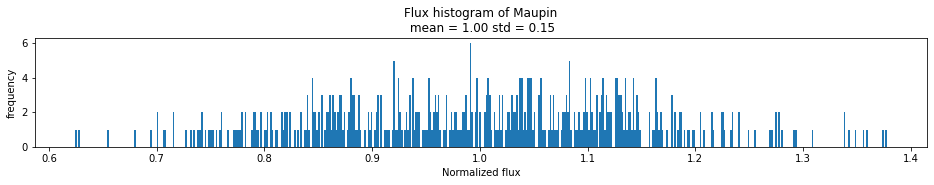

<Figure size 432x288 with 0 Axes>

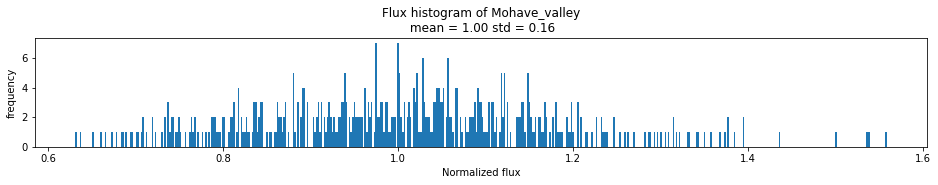

<Figure size 432x288 with 0 Axes>

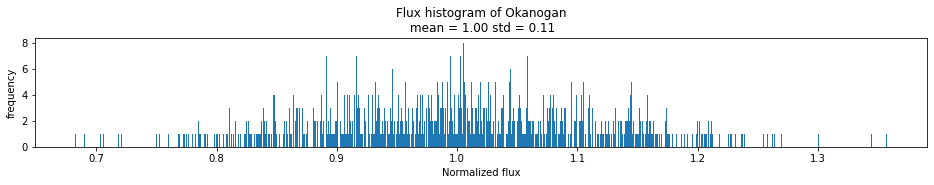

<Figure size 432x288 with 0 Axes>

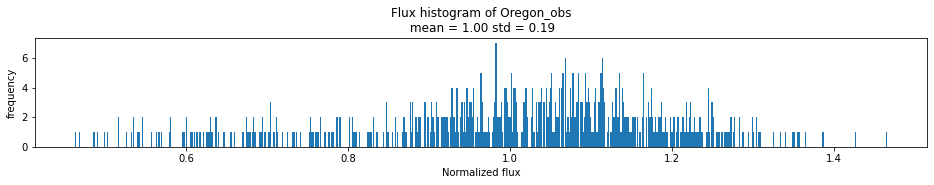

<Figure size 432x288 with 0 Axes>

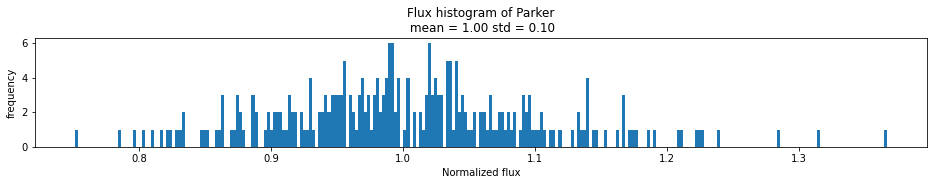

<Figure size 432x288 with 0 Axes>

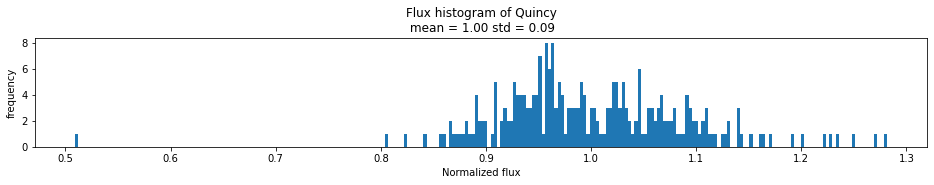

<Figure size 432x288 with 0 Axes>

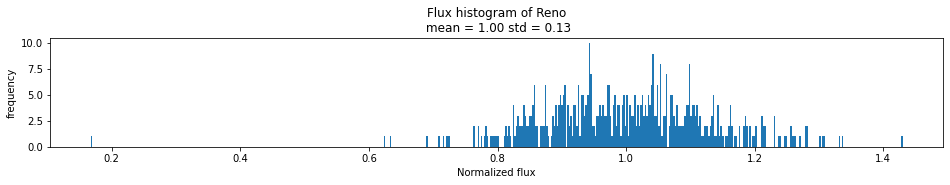

<Figure size 432x288 with 0 Axes>

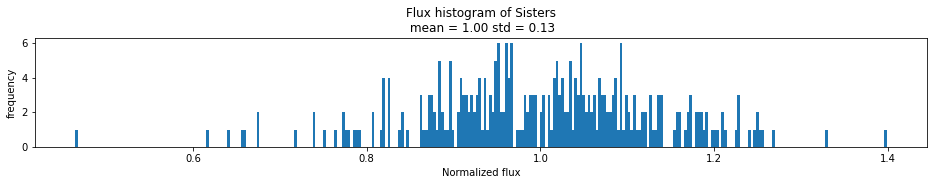

<Figure size 432x288 with 0 Axes>

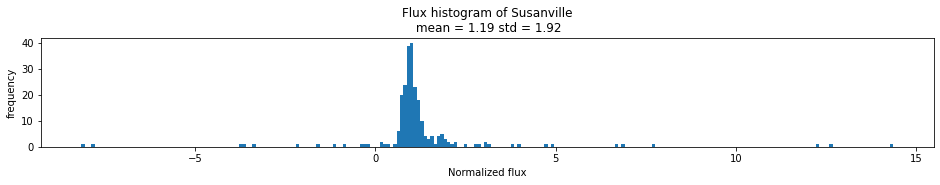

<Figure size 432x288 with 0 Axes>

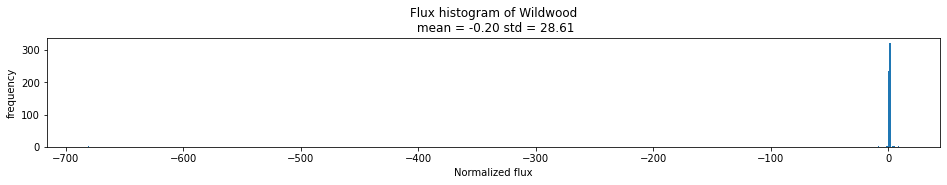

<Figure size 432x288 with 0 Axes>

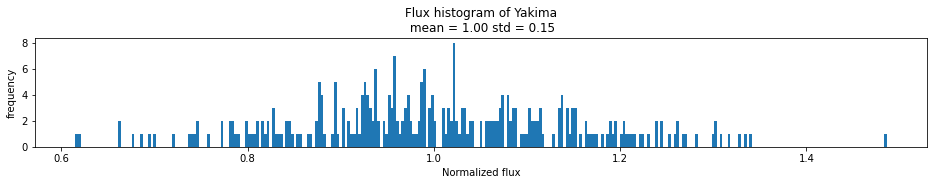

<Figure size 432x288 with 0 Axes>

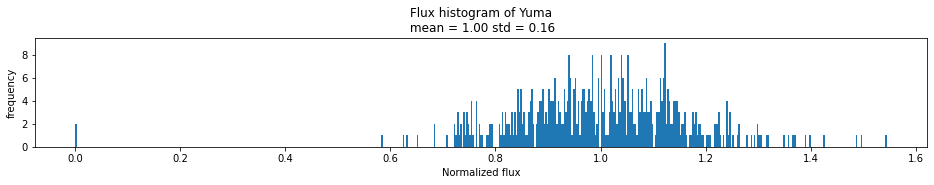

In [ ]:
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]
  plt.clf()
  plt.hist(flux_norm)
  mean = np.mean(flux_norm)
  std = np.std(flux_norm)
  plt.clf()
  plt.figure(figsize=size)
  bins = len(flux_norm)
  plt.hist(flux_norm, bins=bins)
  plt.xlabel("Normalized flux")
  plt.ylabel("frequency")
  plt.title('Flux histogram of '+str(file)[9:-4]+'\n mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std))
  plt.show()

In [ ]:
# ¿ventana debería ser más grande que la ocultación o duración? comprobemos
# window = factor * (duracion)  factor > 1      23:00
# 
def adapted_window(wd_size):
  pass

In [ ]:
def rolling_mean_std_SR(x, wd_size=2):
  """
  Calculates the moving average, the standard deviation and the signal-to-noise
  ratio (SR) of an array x, considering a wd_size window.

  Inputs:
    x [array]: Array to which the mean, the standard deviation and the SR are
               calculated
    
    wd_size [int]: Size of the mobile window, by default it is equal to 2

  Output:
    np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR) [tuple]:

    Tuple composed of the moving average, the mobile standard deviation and the
    mobile SR. It is useful to use a slicing of the output with [0] or [1] or
    [2] respectively to get just one of these.
  """
  rolling_mean = []
  rolling_std = []
  rolling_SR = []

  for i in range(len(x)):
    min = max(0, i - wd_size + 1)
    this_window = x[min : i + 1]

    # Calculate the mean
    window_average = sum(this_window) / len(this_window)
    # Calculate the std
    window_var = sum((x - window_average) ** 2 for x in this_window) / len(this_window)
    window_std = np.sqrt(window_var)

    # Add them to the arrays
    rolling_mean.append(window_average)
    rolling_std.append(window_std)
    rolling_SR.append(window_average/window_std)

  return np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


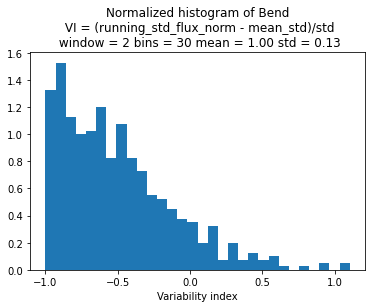

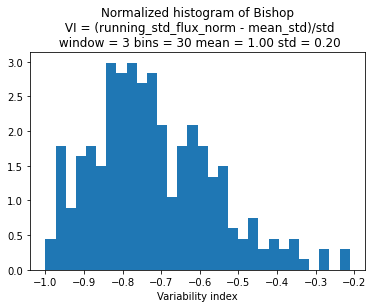

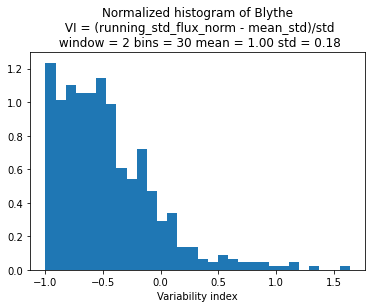

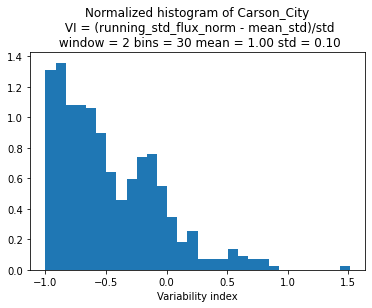

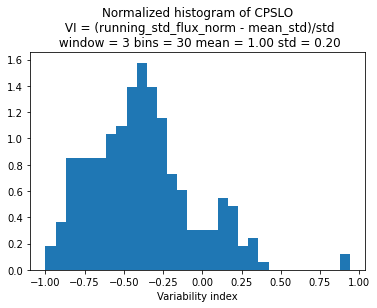

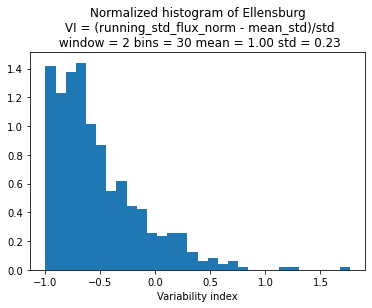

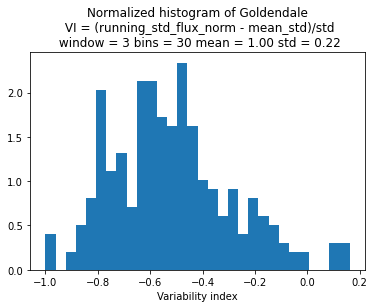

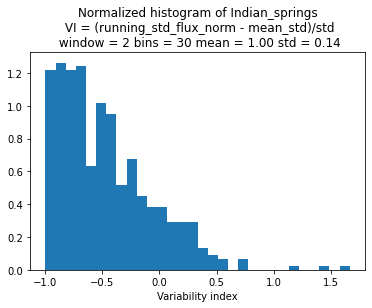

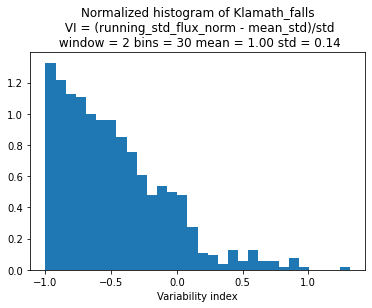

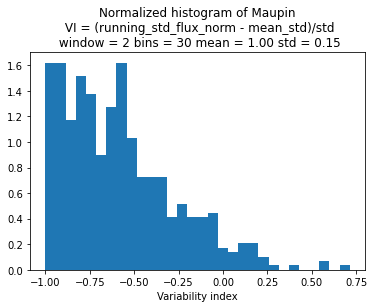

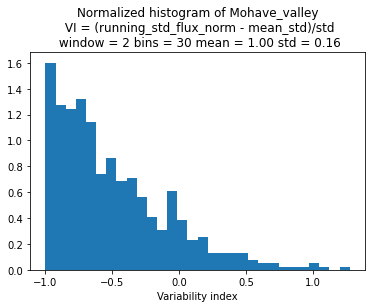

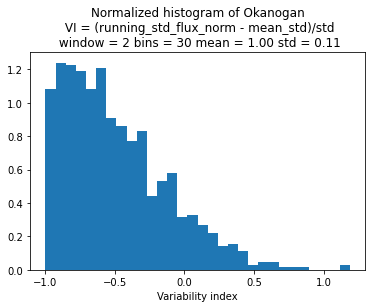

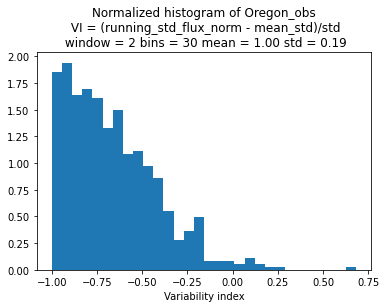

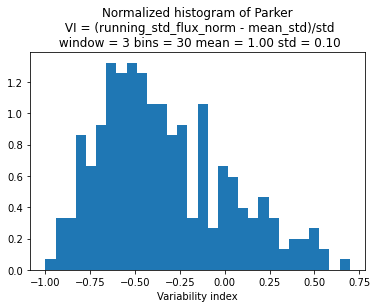

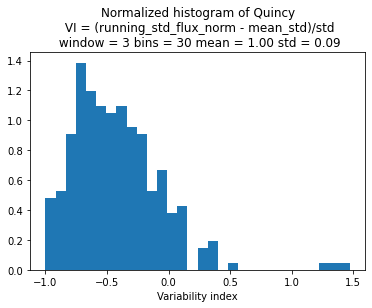

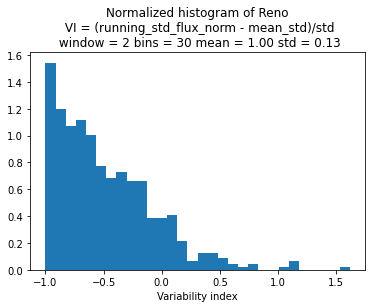

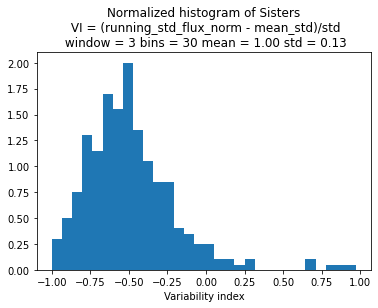

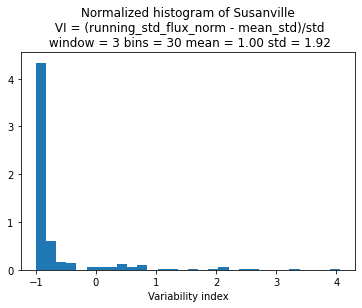

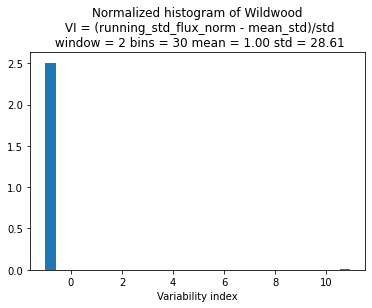

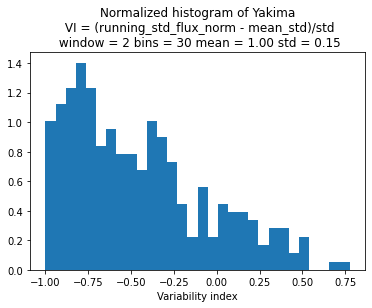

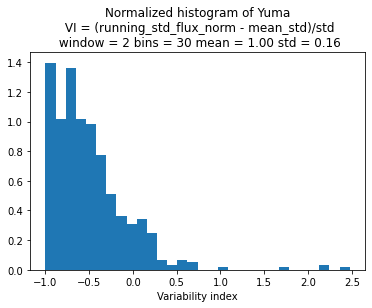

In [ ]:
# VI, mi implementación
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  window = time_avg_sep + 1
  # running_std_flux_norm = flux_norm.rolling(window).std() # pandas
  running_std_flux_norm = rolling_mean_std_SR(flux_norm, window)[1]
  std = np.std(flux_norm)
  mean_std = np.mean(std)
  VI = (running_std_flux_norm - mean_std)/std
  plt.clf()
  bins = 30
  plt.hist(VI, bins=30, density=True)
  plt.title('Normalized histogram of '+str(file)[9:-4]+\
            '\n VI = (running_std_flux_norm - mean_std)/std'+'\n window = {} '.format(window)+\
            'bins = {} '.format(bins)+'mean = {:.2f}'.format(mean)+' std = {:.2f}'.format(std))
  plt.xlabel('Variability index')
  plt.show()

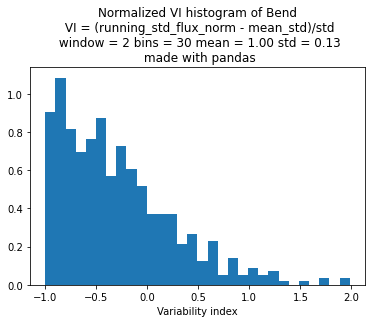

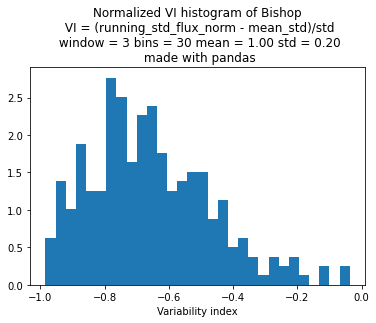

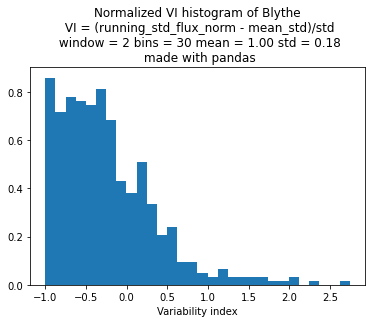

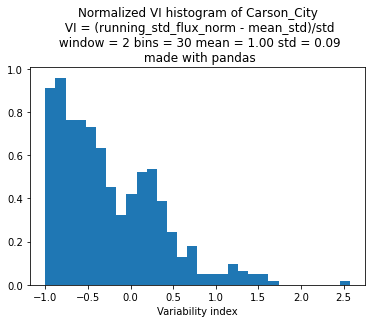

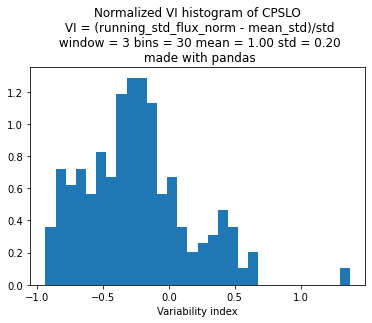

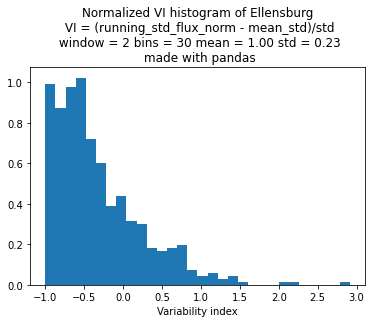

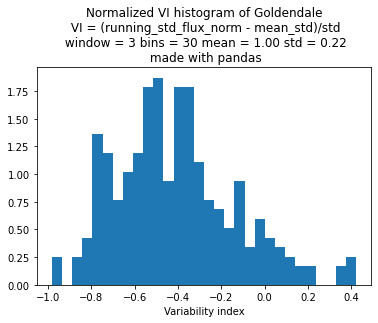

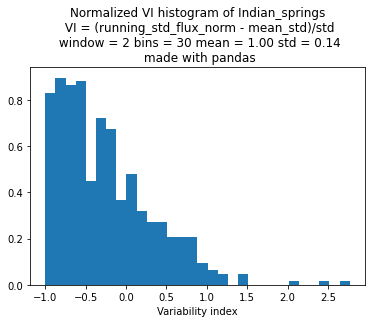

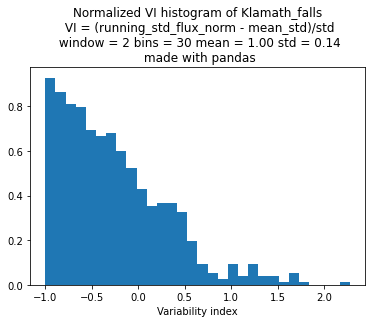

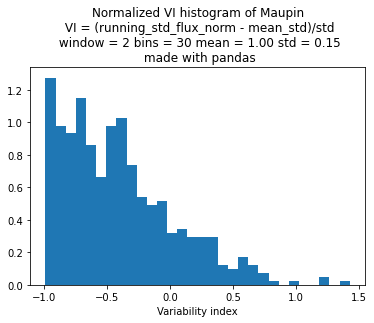

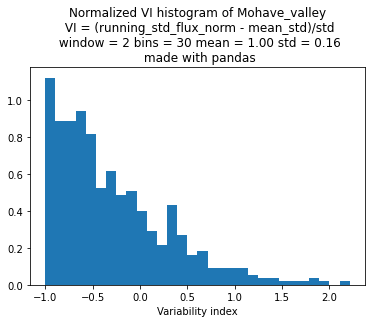

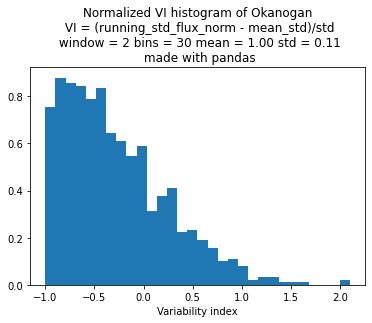

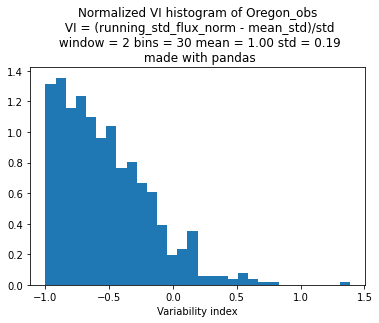

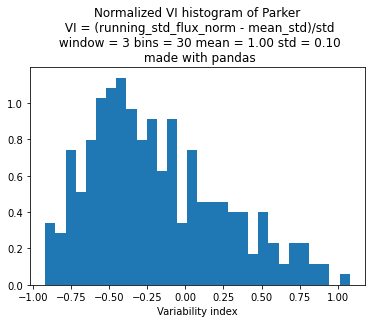

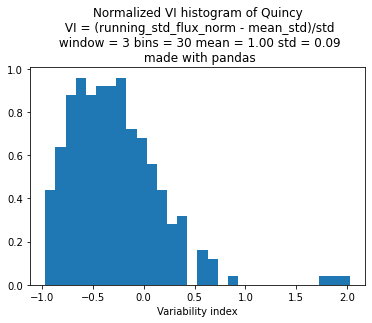

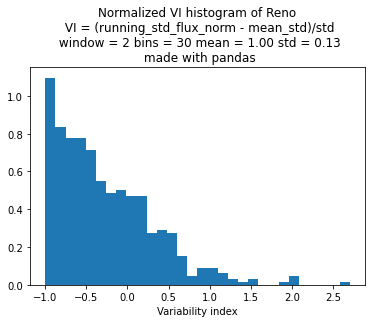

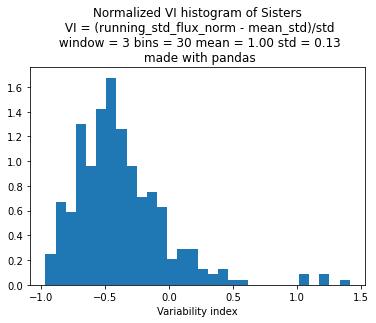

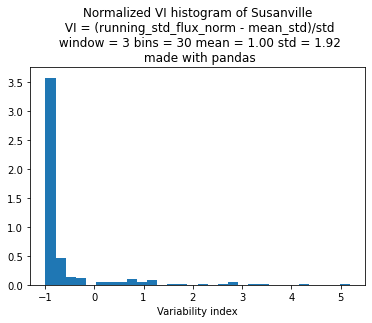

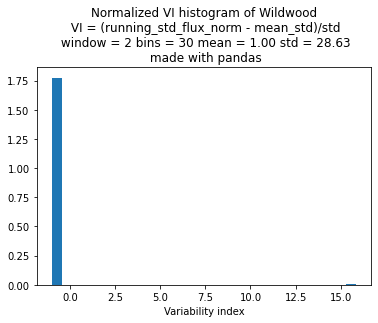

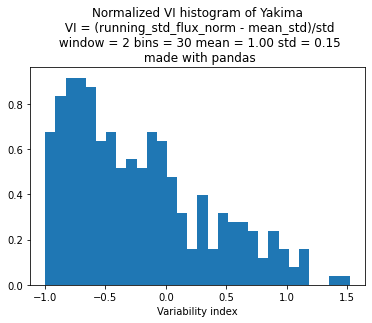

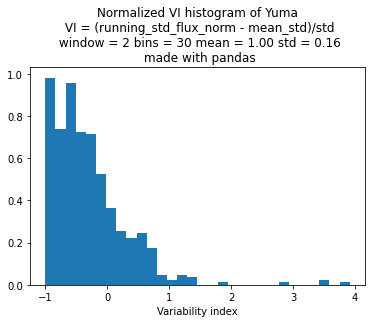

In [ ]:
# VI, hecho con pandas, el histograma sale diferente: la forma es casi igual
# pero la escala horizontal y vertical es levemente distinta, además de las barras
# que cambian 
import pandas as pd 
for file in namelist:
  df = pd.read_csv(file, sep=",")
  time = df.iloc[:, 0]
  flux_norm = df.iloc[:, 1]
  flux_unc = df.iloc[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  window = time_avg_sep + 1
  running_std_flux_norm = flux_norm.rolling(window).std() # pandas
  std = np.std(flux_norm)
  mean_std = np.mean(std)
  VI = (running_std_flux_norm - mean_std)/std
  plt.clf()
  bins = 30
  plt.hist(VI, bins=bins, density=True)
  plt.title('Normalized VI histogram of '+str(file)[9:-4]+\
            '\n VI = (running_std_flux_norm - mean_std)/std'+\
            '\n window = {} '.format(window)+'bins = {} '.format(bins)+\
            'mean = {:.2f}'.format(mean)+' std = {:.2f}'.format(std)+\
            '\n made with pandas')
  plt.xlabel('Variability index')
  plt.show()

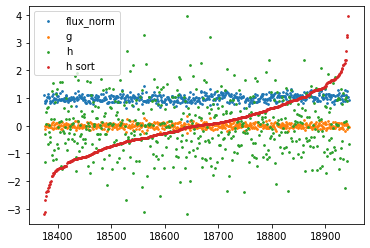

In [ ]:
df = pd.read_csv('20190128_Reno.dat', sep=",")
time = df.iloc[:, 0]
flux_norm = df.iloc[:, 1]
flux_unc = df.iloc[:, 2]
running_mean_flux_norm = flux_norm.rolling(window).mean()
g = flux_norm - running_mean_flux_norm
std_g = np.std(g)
h = np.array(g/std_g)
h_sort = np.sort(h)
s = 3
plt.scatter(time, flux_norm, label='flux_norm', s=s)
plt.scatter(time, g, label='g', s=s)
plt.scatter(time, h, label='h', s=s)
plt.scatter(time, np.sort(h), label='h sort', s=s)
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


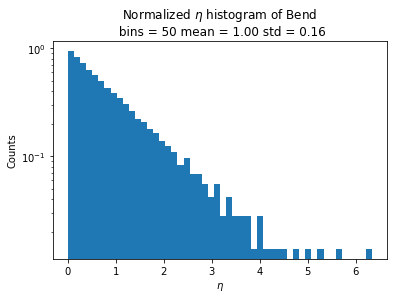

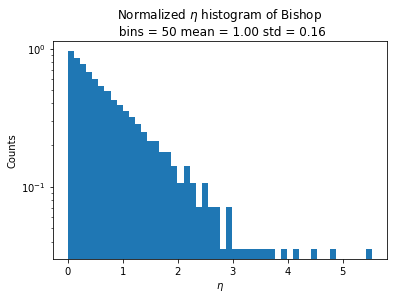

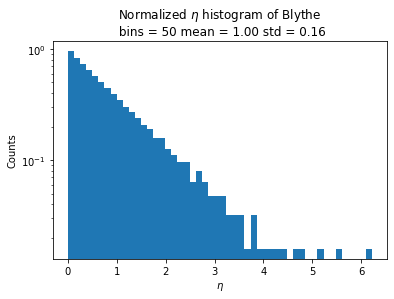

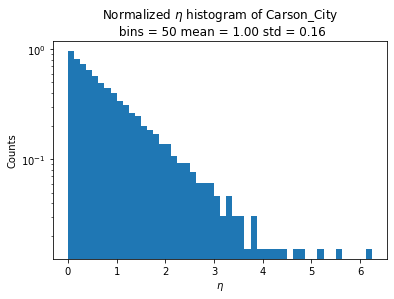

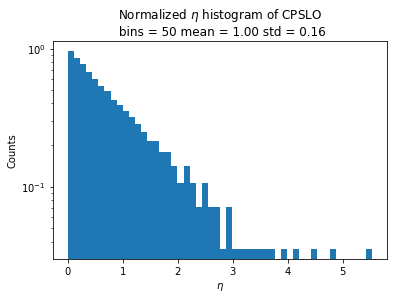

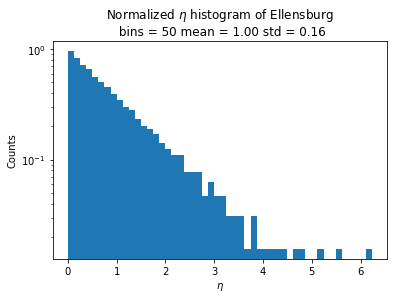

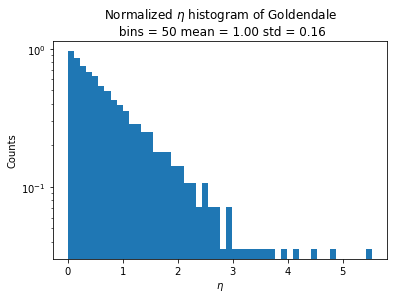

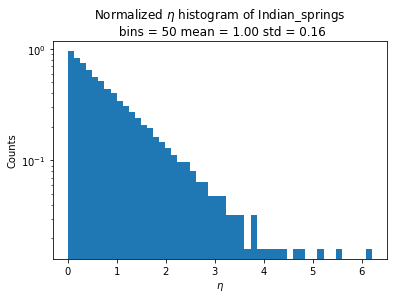

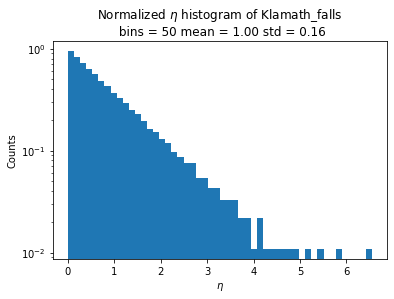

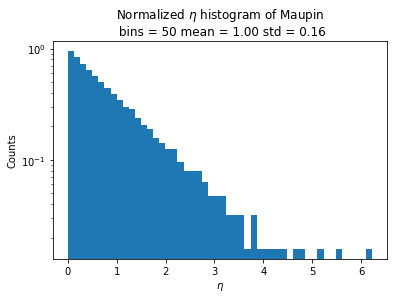

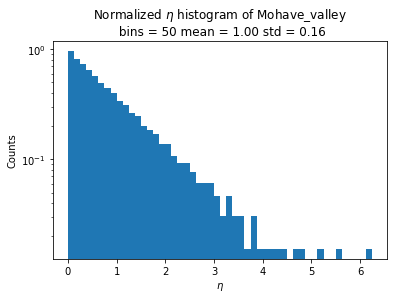

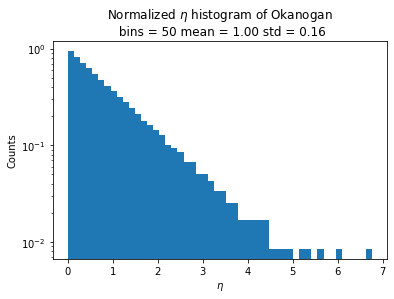

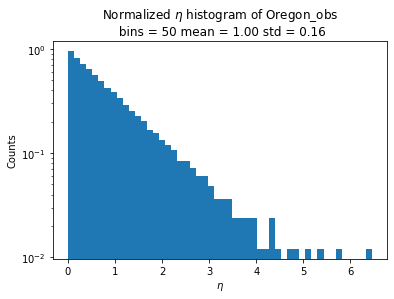

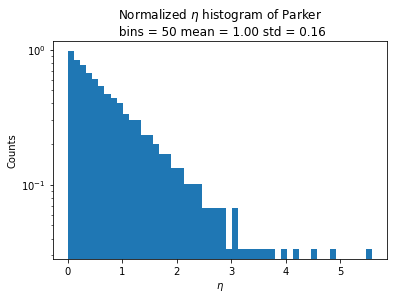

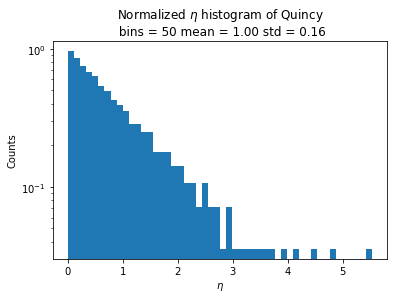

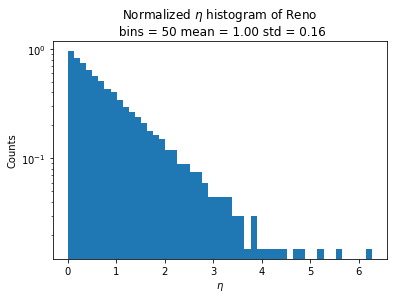

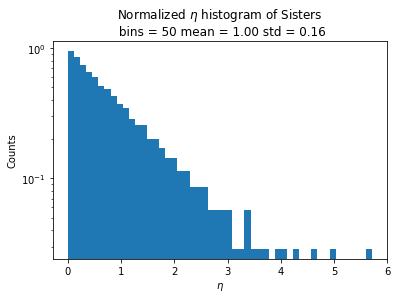

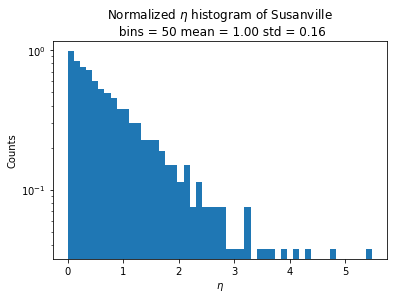

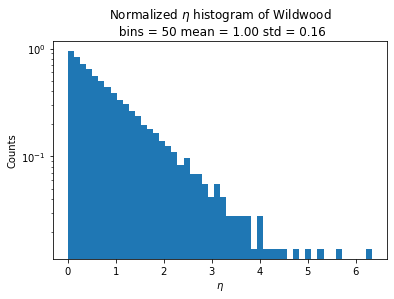

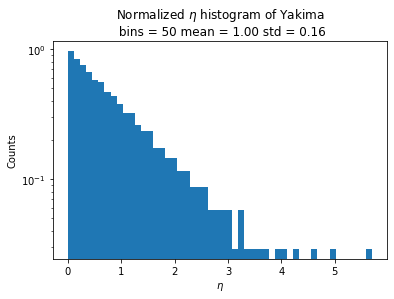

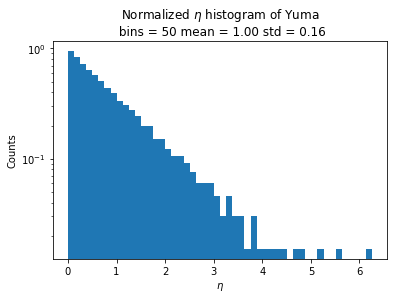

In [ ]:
# eta, hecho con mi implementación
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  window = time_avg_sep + 1
  running_mean_flux_norm = rolling_mean_std_SR(flux_norm, window)[0]
  g = flux_norm - running_mean_flux_norm
  std_g = np.std(g)
  h = np.array(g/std_g)
  h_sort = np.sort(h)
  Np = len(flux_norm)
  r = np.arange(len(h))[h.argsort()] + 1
  counts = np.arange(Np)
  eta = -np.log(r/Np)
  plt.clf()
  bins=50
  plt.hist(eta, bins=bins, log=True, density=True);
  plt.title('Normalized $η$ histogram of '+str(file)[9:-4]+\
            '\n bins = {} '.format(bins)+'mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std))
  plt.xlabel('$η$')
  plt.ylabel('Counts')
  plt.show()

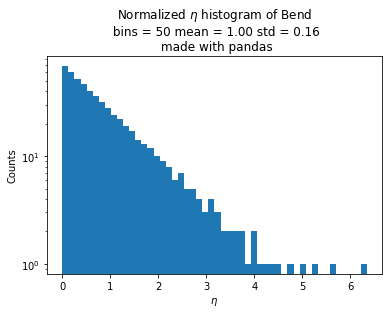

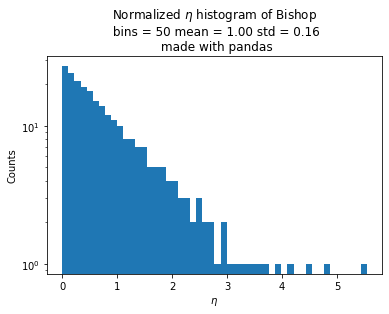

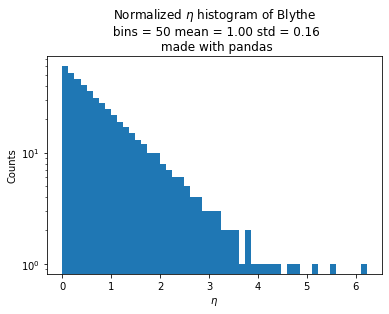

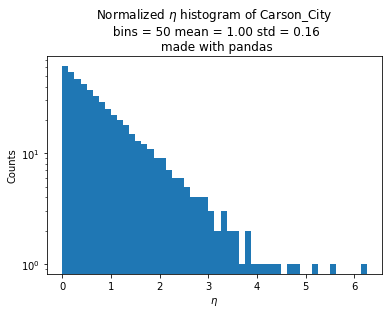

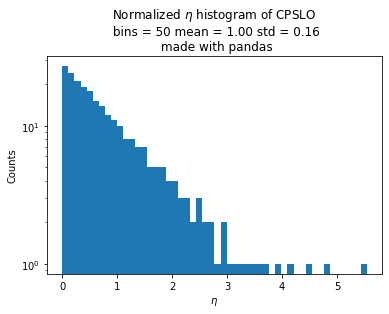

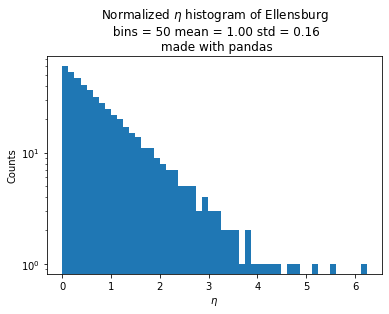

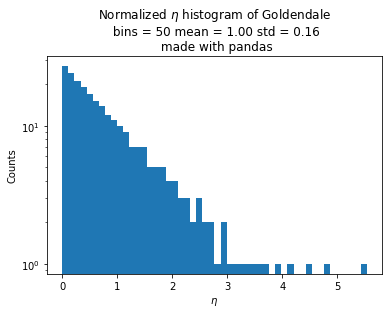

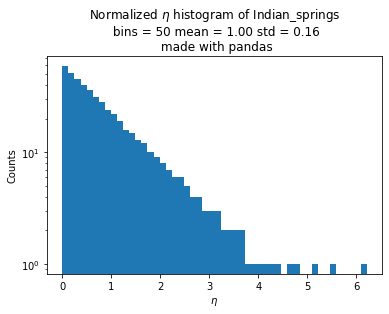

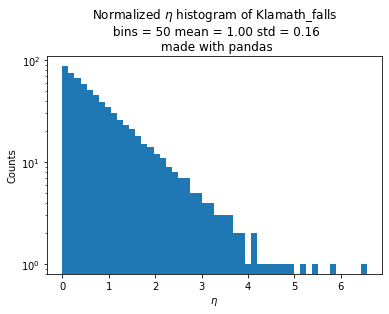

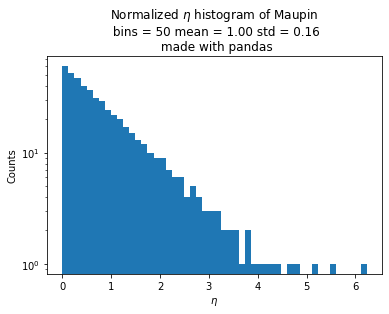

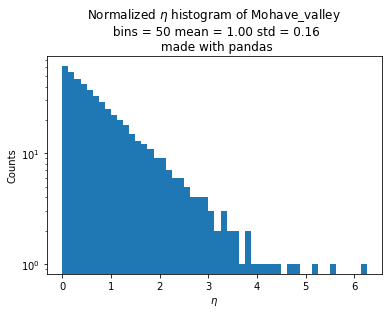

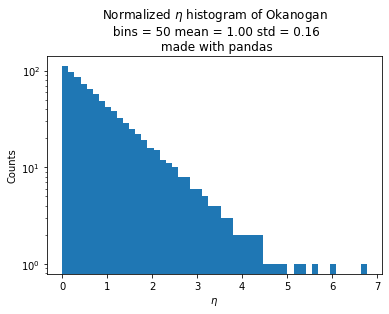

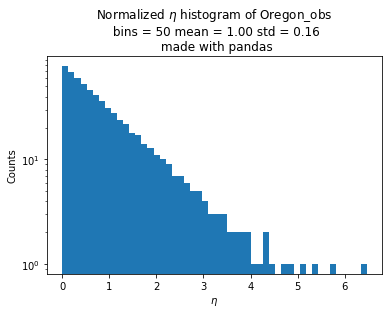

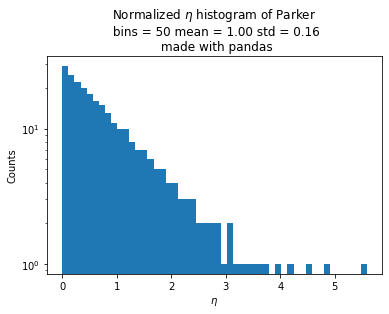

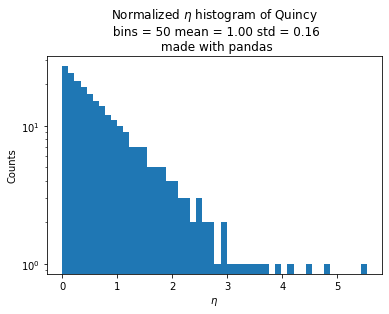

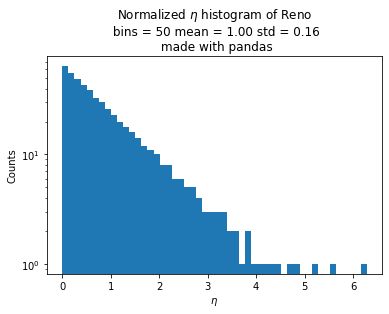

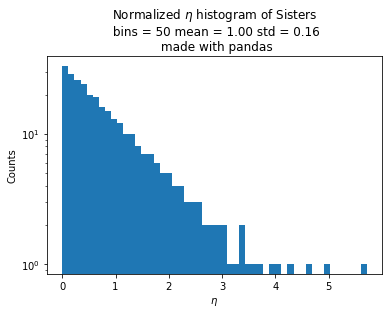

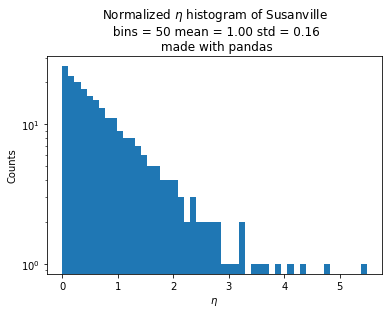

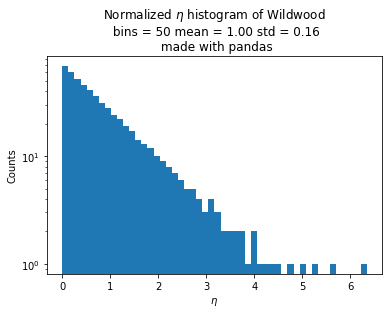

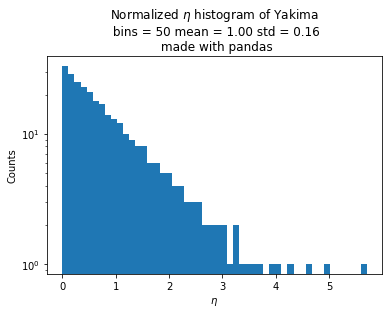

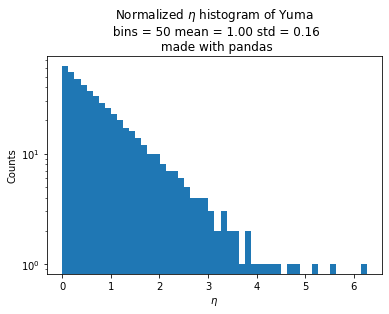

In [ ]:
# eta, hecho con pandas
for file in namelist:
  df = pd.read_csv(file, sep=",")
  time = df.iloc[:, 0]
  flux_norm = df.iloc[:, 1]
  flux_unc = df.iloc[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  window = time_avg_sep + 1
  running_mean_flux_norm = flux_norm.rolling(window).mean()
  g = flux_norm - running_mean_flux_norm
  std_g = np.std(g)
  h = np.array(g/std_g)
  h_sort = np.sort(h)
  Np = len(flux_norm)
  r = np.arange(len(h))[h.argsort()] + 1
  counts = np.arange(Np)
  eta2 = -np.log(r/Np)
  plt.clf()
  plt.hist(eta2, bins=50, log=True);
  plt.title('Normalized $η$ histogram of '+str(file)[9:-4]+\
            '\n bins = {} '.format(bins)+'mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std)+'\n made with pandas')
  plt.xlabel('$η$')
  plt.ylabel('Counts')
  plt.show()

time average separation: 2
Mean, std of flux_norm are: 0.9968433070866138 0.09838353808153646
Mean, std of new_flux_norm are: 1.0231270331129918 0.40306804395640616


<Figure size 432x288 with 0 Axes>

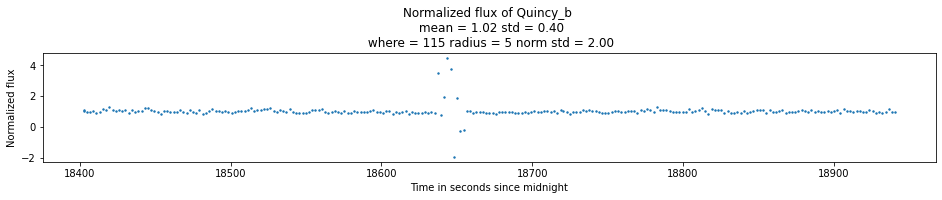

In [ ]:
from scipy.stats import norm 
with open('20190128_Quincy_b.dat', 'r') as f:
  data = []
  d = f.readlines()
  for i in d:
    k = i.rstrip().split(",")
    data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]

np.random.seed(0)
def drop(flux, where, radius, norm_std):
  """
  Processes a given array, where around a given point with a radius
  given, changes its values ​​with a normal distribution N(0, sigma) with average
  equal to 0 and given standard deviation. The radius can be interpreted as the
  half of the occultation time only if the exposure time is 1 s.

  Inputs:
    flux [array]: Array representing the normalized flow
    where [int]:  Midpoint of flow drop
    radius [int]: Size of the radius of the "ball" within which the flow will be
                  modified with the normal distribution
    norm_std [float]: Standard deviation that will be used by the normal
                    distribution

  Output:
    flux [array]: Array of the modified flow with the normal distribution
                  N(0, sigma) with mean equal to 0 and given standard deviation.

  """
  copied_flux = np.copy(flux)
  for i in range(len(copied_flux)):
    if np.abs(i - where) < radius:
      copied_flux[i] = float(norm.rvs(loc=0, scale=norm_std, size=1))
  return copied_flux

where = 115
distances = []
# compute distances between points
for j in range(len(time) - 1):
  dist = time[j] - time[j+1]
  distances.append(dist) 
# get the average
time_avg_sep = int(np.abs(sum(distances))/len(distances))
print('time average separation: '+str(time_avg_sep))
radius = 5
# norm_std = np.std(flux_norm)
norm_std = 2
# new_flux_norm = drop(flux_norm, where, radius, np.std(flux_norm))
new_flux_norm = drop(flux_norm, where, radius, norm_std)
mean, std = np.mean(flux_norm), np.std(flux_norm)
print('Mean, std of flux_norm are: '+ str(mean), str(std))
new_mean, new_std = np.mean(new_flux_norm), np.std(new_flux_norm)
print('Mean, std of new_flux_norm are: '+ str(new_mean), str(new_std))
plt.clf()
plt.figure(figsize=size)
plt.scatter(time, new_flux_norm, s=2)
plt.title('Normalized flux of Quincy_b \n mean = {:.2f}'.format(new_mean)+\
          ' std = {:.2f}'.format(new_std)+'\n where = {}'.format(where)+\
          ' radius = {}'.format(radius)+' norm std = {:.2f}'.format(norm_std))
plt.xlabel("Time in seconds since midnight")
plt.ylabel("Normalized flux")
plt.show()

# https://docs.astropy.org/en/stable/api/astropy.stats.sigma_clip.html

time average separation: 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


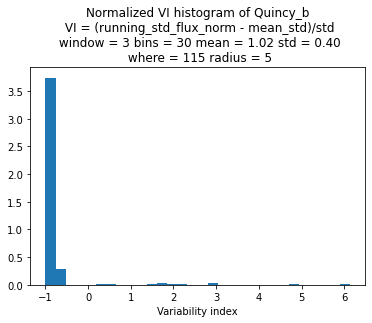

In [ ]:
# VI quincy_b, mi implementación
distances = []
# compute distances between points
for i in range(len(time) - 1):
  dist = time[i] - time[i+1]
  distances.append(dist) 
# get the average
time_avg_sep = int(np.abs(sum(distances))/len(distances))
print('time average separation: '+str(time_avg_sep))
window = time_avg_sep + 1
# running_std_flux_norm = flux_norm.rolling(window).std() # pandas
running_std_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[1]
std = np.std(new_flux_norm)
mean_std = np.mean(std)
VI = (running_std_flux_norm - mean_std)/std
mean = np.mean(flux_norm)
std = np.std(new_flux_norm)
plt.clf()
bins = 30
plt.hist(VI, bins=30, density=True)
plt.title('Normalized VI histogram of Quincy_b'+\
          '\n VI = (running_std_flux_norm - mean_std)/std'+'\n window = {} '\
          .format(window)+'bins = {} '.format(bins)+'mean = {:.2f}'\
          .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
          .format(where)+' radius = {}'.format(radius))
plt.xlabel('Variability index')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


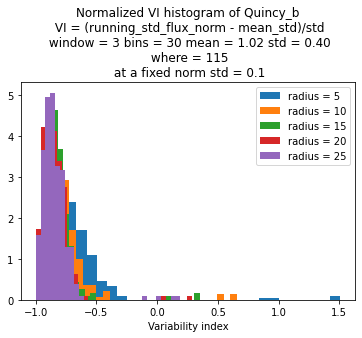

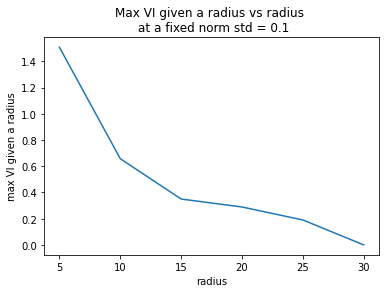

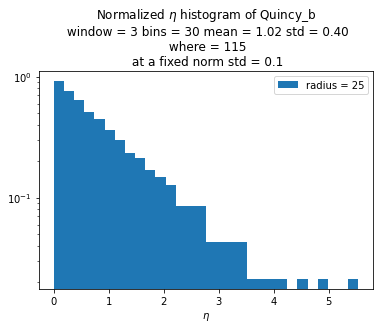

Text(0.5, 1.0, 'Max $η$ given a radius vs radius \n at a fixed norm std = 0.1')

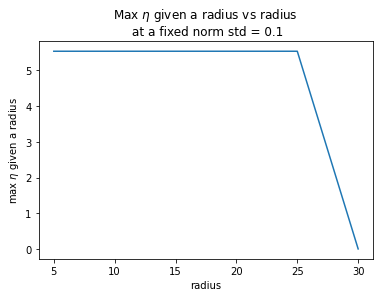

In [ ]:
# histogramas VI y eta para distintos radios, a norm_std = 0.1 fijo
np.random.seed(0)
where = 115
list_radius = [5, 10, 15, 20, 25, 30]
# list_radius = list(np.arange(20))
list_VI = []
list_eta = []
for i in range(len(list_radius)-1):
  norm_std = 0.1
  new_flux_norm = drop(flux_norm, where, list_radius[i], norm_std)
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  # print('time average separation: '+str(time_avg_sep))
  window = time_avg_sep + 1
  # running_std_flux_norm = flux_norm.rolling(window).std() # pandas
  running_std_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[1]
  std = np.std(new_flux_norm)
  mean_std = np.mean(std)
  VI = (running_std_flux_norm - mean_std)/std;
  list_VI.append(np.max(VI))
  bins = 30
  plt.hist(VI, bins=bins, density=True,
           label='radius = {}'.format(list_radius[i]))
  plt.title('Normalized VI histogram of Quincy_b'+\
            '\n VI = (running_std_flux_norm - mean_std)/std'+'\n window = {} '\
            .format(window)+'bins = {} '.format(bins)+'mean = {:.2f}'\
            .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
            .format(where)+'\n at a fixed norm std = {}'.format(norm_std))
  plt.xlabel('Variability index')

plt.legend()
plt.show()

plt.clf()
list_VI.append(0)
plt.plot(list_radius, list_VI)
plt.xlabel('radius')
plt.ylabel('max VI given a radius')
plt.title('Max VI given a radius vs radius \n at a fixed norm std = {}'.format(norm_std))
plt.show()

for i in range(len(list_radius)-1):
  norm_std = 0.1
  new_flux_norm = drop(flux_norm, where, list_radius[i], np.std(flux_norm))
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  # print('time average separation: '+str(time_avg_sep))
  window = time_avg_sep + 1
  running_mean_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[0]
  g = flux_norm - running_mean_flux_norm
  std_g = np.std(g)
  h = np.array(g/std_g)
  h_sort = np.sort(h)
  Np = len(flux_norm)
  r = np.arange(len(h))[h.argsort()] + 1
  counts = np.arange(Np)
  eta = -np.log(r/Np)
  list_eta.append(np.max(eta))
  bins = 30
  plt.clf()
  plt.hist(eta, bins=bins, log=True, density=True,
           label='radius = {}'.format(list_radius[i]))
  plt.title('Normalized $η$ histogram of Quincy_b'\
            +'\n window = {} '\
            .format(window)+'bins = {} '.format(bins)+'mean = {:.2f}'\
            .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
            .format(where)+'\n at a fixed norm std = {}'.format(norm_std))
  plt.xlabel('$η$')

plt.legend()
plt.show()

plt.clf()
list_eta.append(0)
plt.plot(list_radius, list_eta)
plt.xlabel('radius')
plt.ylabel('max $η$ given a radius')
plt.title('Max $η$ given a radius vs radius \n at a fixed norm std = {}'.format(norm_std))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


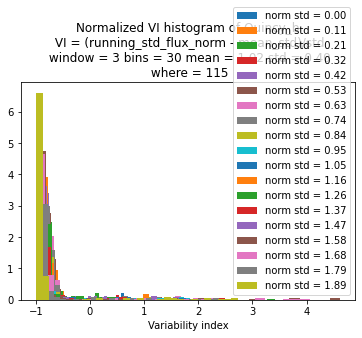

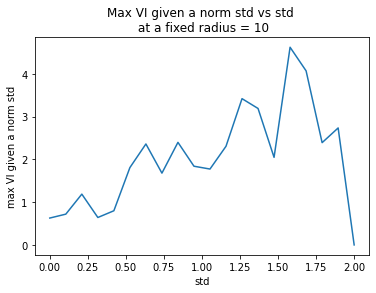

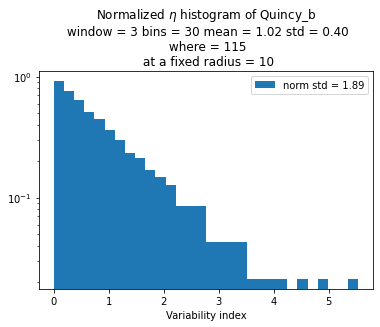

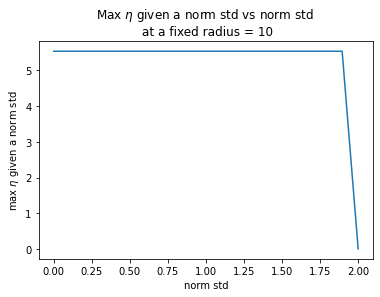

In [ ]:
# histograma VI y eta para distintos norm_std, a radius = 10 fijo
np.random.seed(0)
where = 115
radius = 10
list_std = list(np.linspace(0, 2, num=20))
list_VI = []
list_eta = []
for i in range(len(list_std)-1):
  norm_std = 0.1
  new_flux_norm = drop(flux_norm, where, radius, list_std[i])
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  # print('time average separation: '+str(time_avg_sep))
  window = time_avg_sep + 1
  # running_std_flux_norm = flux_norm.rolling(window).std() # pandas
  running_std_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[1]
  std = np.std(new_flux_norm)
  mean_std = np.mean(std)
  VI = (running_std_flux_norm - mean_std)/std;
  list_VI.append(np.max(VI))
  bins = 30
  plt.hist(VI, bins=bins, density=True,
           label='norm std = {:.2f}'.format(list_std[i]))
  plt.title('Normalized VI histogram of Quincy_b'+\
          '\n VI = (running_std_flux_norm - mean_std)/std'+'\n window = {} '\
          .format(window)+'bins = {} '.format(bins)+'mean = {:.2f}'\
          .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
          .format(where))
  plt.xlabel('Variability index')

plt.legend()
plt.show()

plt.clf()
list_VI.append(0)
plt.plot(list_std, list_VI)
plt.xlabel('std')
plt.ylabel('max VI given a norm std')
plt.title('Max VI given a norm std vs std \n at a fixed radius = {}'.format(radius))
plt.show()


for i in range(len(list_std)-1):
  norm_std = 0.1
  new_flux_norm = drop(flux_norm, where, radius, list_std[i])
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  # print('time average separation: '+str(time_avg_sep))
  window = time_avg_sep + 1
  running_mean_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[0]
  g = flux_norm - running_mean_flux_norm
  std_g = np.std(g)
  h = np.array(g/std_g)
  h_sort = np.sort(h)
  Np = len(flux_norm)
  r = np.arange(len(h))[h.argsort()] + 1
  counts = np.arange(Np)
  eta = -np.log(r/Np)
  list_eta.append(np.max(eta))
  bins = 30
  plt.clf()
  plt.hist(eta, bins=bins, log=True, density=True,
           label='norm std = {:.2f}'.format(list_std[i]))
  plt.title('Normalized $η$ histogram of Quincy_b'+\
            '\n window = {} '\
          .format(window)+'bins = {} '.format(bins)+'mean = {:.2f}'\
          .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
          .format(where)+'\n at a fixed radius = {}'.format(radius))
  plt.xlabel('Variability index')

plt.legend()
plt.show()

plt.clf()
list_eta.append(0)
plt.plot(list_std, list_eta)
plt.xlabel('norm std')
plt.ylabel('max $η$ given a norm std')
plt.title('Max $η$ given a norm std vs norm std \n at a fixed radius = {}'.format(radius))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


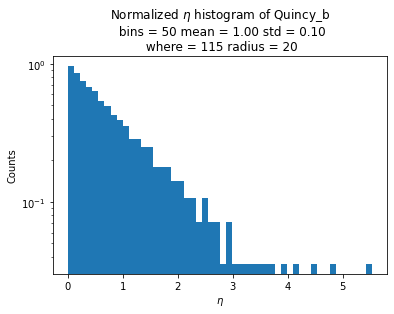

In [ ]:
# # eta quincy_b con mi implementación
where = 115
radius = 20
norm_std = 0.1
new_flux_norm = drop(flux_norm, where, radius, norm_std)
distances = []
# compute distances between points
for j in range(len(time) - 1):
  dist = time[j] - time[j+1]
  distances.append(dist) 
# get the average
time_avg_sep = int(np.abs(sum(distances))/len(distances))
window = time_avg_sep + 1
running_mean_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[0]
end_values = running_mean_flux_norm[250], running_mean_flux_norm[251]
g = flux_norm - running_mean_flux_norm
std_g = np.std(g)
h = np.array(g/std_g)
h_sort = np.sort(h)
Np = len(flux_norm)
r = np.arange(len(h))[h.argsort()] + 1
counts = np.arange(Np)
eta = -np.log(r/Np)
mean = np.mean(flux_norm)
std = np.std(flux_norm) 
plt.clf()
bins=50
plt.hist(eta, bins=bins, log=True, density=True);
plt.title('Normalized $η$ histogram of Quincy_b \n bins = {} '.format(bins)+\
          'mean = {:.2f}'.format(mean)+' std = {:.2f}'.format(std)+\
          '\n where = {}'.format(where)+' radius = {}'.format(radius))
plt.xlabel('$η$')
plt.ylabel('Counts')
plt.show()

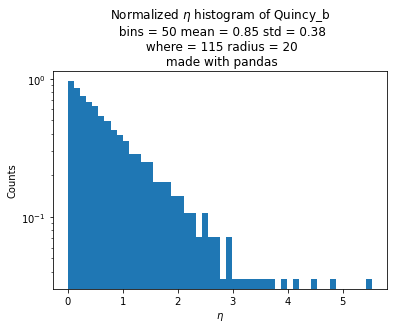

In [ ]:
# eta quincy_b hecho con pandas
df2 = pd.DataFrame({'time': time, 'flux_norm': flux_norm, 'flux_unc':flux_unc})

time = df2.iloc[:, 0]
flux_norm = df2.iloc[:, 1]
flux_unc = df2.iloc[:, 2]
where = 115
radius = 20
norm_std = 0.1
windows = 3
new_flux_norm = drop(flux_norm, where, radius, norm_std)
running_mean_flux_norm = pd.DataFrame(new_flux_norm).rolling(window).mean() # pandas
g = new_flux_norm - running_mean_flux_norm[0]
std_g = np.std(g)
h = np.array(g/std_g)
h_sort = np.sort(h)
Np = len(new_flux_norm)
r = np.arange(len(h))[h.argsort()] + 1
counts = np.arange(Np)
eta = -np.log(r/Np)
mean = np.mean(new_flux_norm)
std = np.std(new_flux_norm) 
plt.clf()
bins=50
plt.hist(eta, bins=bins, log=True, density=True);
plt.title('Normalized $η$ histogram of Quincy_b \n bins = {} '.format(bins)+\
          'mean = {:.2f}'.format(mean)+' std = {:.2f}'.format(std)+\
          '\n where = {}'.format(where)+' radius = {}'.format(radius)+\
          '\n made with pandas')
plt.xlabel('$η$')
plt.ylabel('Counts')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


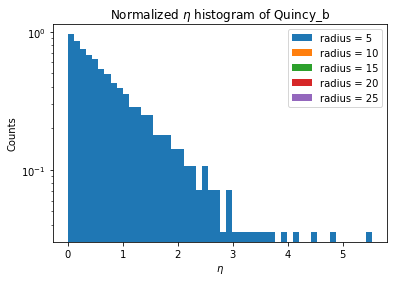

In [ ]:
where = 115
radius = 10
norm_std = 0.1
list_radius = [5, 10, 15, 20, 25, 30]
for i in range(len(list_radius)-1):
  new_flux_norm = drop(flux_norm, where, list_radius[i], norm_std)
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  window = time_avg_sep + 1
  running_mean_flux_norm = rolling_mean_std_SR(new_flux_norm, window)[0]
  end_values = running_mean_flux_norm[250], running_mean_flux_norm[251]
  g = flux_norm - running_mean_flux_norm
  std_g = np.std(g)
  h = np.array(g/std_g)
  h_sort = np.sort(h)
  Np = len(flux_norm)
  r = np.arange(len(h))[h.argsort()] + 1
  counts = np.arange(Np)
  eta = -np.log(r/Np)
  mean = np.mean(flux_norm)
  std = np.std(flux_norm)
  bins=50
  plt.hist(eta, bins=bins, log=True, density=True,
           label='radius = {}'.format(list_radius[i]), zorder=len(list_radius)-i);
  plt.title('Normalized $η$ histogram of Quincy_b')
  plt.xlabel('$η$')
  plt.ylabel('Counts')

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


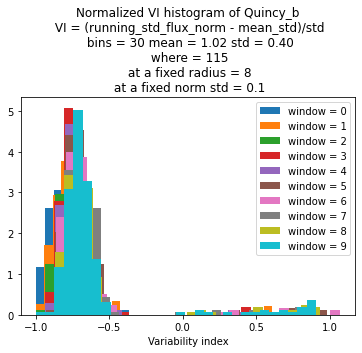

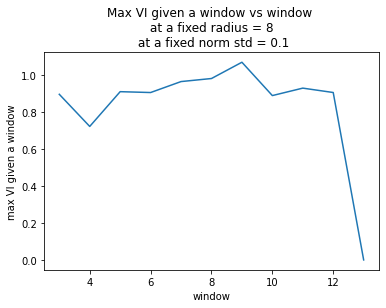

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


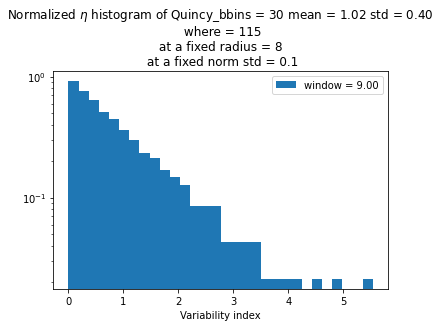

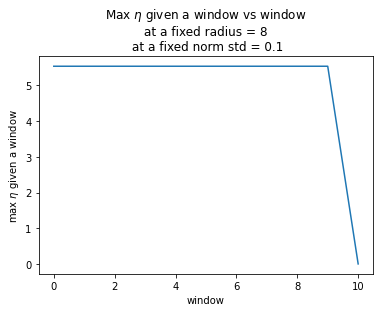

In [ ]:
# ¿ventana debería ser más grande que la ocultación o duración? comprobemos
# radio = 5 fijo, y nos damos distintas ventanas (menores y mayores a radio)

# histogramas VI y eta para distintos windows, a radio = 5 y a norm_std = 0.1 fijo
np.random.seed(0)
where = 115
radius = 8
norm_std = 0.1
# list_radius = [5, 10, 15, 20, 25, 30]
# list_radius = list(np.arange(20))
# list_window = list(np.linspace(3, 8, num=6))
list_window = list(np.arange(11))
list_VI = []
list_eta = []
for i in range(len(list_window)-1):
  new_flux_norm = drop(flux_norm, where, radius, norm_std)
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  # print('time average separation: '+str(time_avg_sep))
  window_time_avg_sep = time_avg_sep + 1
  # running_std_flux_norm = flux_norm.rolling(window).std() # pandas
  running_std_flux_norm = rolling_mean_std_SR(new_flux_norm, window_time_avg_sep + list_window[i])[1]
  std = np.std(new_flux_norm)
  mean_std = np.mean(std)
  VI = (running_std_flux_norm - mean_std)/std;
  list_VI.append(np.max(VI))
  bins = 30
  plt.hist(VI, bins=bins, density=True,
           label='window = {}'.format(list_window[i]))
  plt.title('Normalized VI histogram of Quincy_b'+\
            '\n VI = (running_std_flux_norm - mean_std)/std'+\
            '\n bins = {} '.format(bins)+'mean = {:.2f}'\
            .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
            .format(where)+'\n at a fixed radius = {}'.format(radius)+\
            '\n at a fixed norm std = {}'.format(norm_std))
  plt.xlabel('Variability index')

plt.legend()
plt.show()

plt.clf()
list_VI.append(0)
plt.plot(np.array(window_time_avg_sep) + np.array(list_window), list_VI)
plt.xlabel('window')
plt.ylabel('max VI given a window')
plt.title('Max VI given a window vs window \n at a fixed radius = {}'\
          .format(radius)+' \n at a fixed norm std = {}'.format(norm_std))
plt.show()


for i in range(len(list_window)-1):
  norm_std = 0.1
  new_flux_norm = drop(flux_norm, where, radius, norm_std)
  distances = []
  # compute distances between points
  for j in range(len(time) - 1):
    dist = time[j] - time[j+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = int(np.abs(sum(distances))/len(distances))
  # print('time average separation: '+str(time_avg_sep))
  window_time_avg_sep = time_avg_sep + 1
  running_mean_flux_norm = rolling_mean_std_SR(new_flux_norm, window_time_avg_sep + list_window[i])[0]
  g = flux_norm - running_mean_flux_norm
  std_g = np.std(g)
  h = np.array(g/std_g)
  h_sort = np.sort(h)
  Np = len(flux_norm)
  r = np.arange(len(h))[h.argsort()] + 1
  counts = np.arange(Np)
  eta = -np.log(r/Np)
  list_eta.append(np.max(eta))
  bins = 30
  plt.clf()
  plt.hist(eta, bins=bins, log=True, density=True,
           label='window = {:.2f}'.format(list_window[i]))
  plt.title('Normalized $η$ histogram of Quincy_b'+\
            'bins = {} '.format(bins)+'mean = {:.2f}'\
            .format(new_mean)+' std = {:.2f}'.format(new_std)+'\n where = {}'\
            .format(where)+'\n at a fixed radius = {}'.format(radius)+\
            ' \n at a fixed norm std = {}'.format(norm_std))
  plt.xlabel('Variability index')

plt.legend()
plt.show()

plt.clf()
list_eta.append(0)
plt.plot(list_window, list_eta)
plt.xlabel('window')
plt.ylabel('max $η$ given a window')
plt.title('Max $η$ given a window vs window \n at a fixed radius = {}'\
          .format(radius)+' \n at a fixed norm std = {}'.format(norm_std))
plt.show()

In [ ]:
# https://en.wikipedia.org/wiki/Cross-correlation#/media/File:Comparison_convolution_correlation.svg
# https://numpy.org/doc/stable/reference/generated/numpy.convolve.html#numpy.convolve
# https://numpy.org/doc/stable/reference/generated/numpy.correlate.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html#scipy.signal.fftconvolve
# https://stackoverflow.com/questions/66282740/cross-correlate-misunderstanding-why-does-it-look-like-a-triangle-why-wont-it#:~:text=why%20it%20looks%20like%20a%20triangle

with open('20190128_Yuma.dat', 'r') as f:
  data = []
  d = f.readlines()
  for i in d:
    k = i.rstrip().split(",")
    data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]

def generate_kernel(flux, where, radius):
  array = np.ones(len(flux))
  for i in range(len(flux)):
    if np.abs(i - where) < radius:
      array[i] = 0
  return array


46
46.5


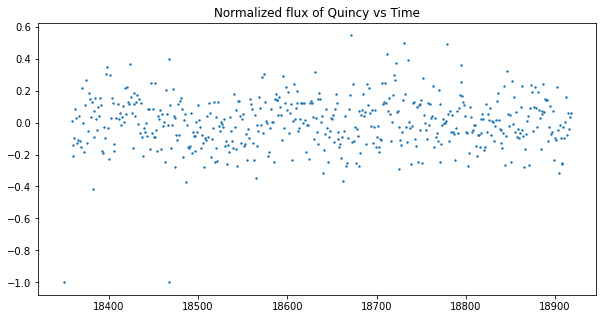

<Figure size 432x288 with 0 Axes>

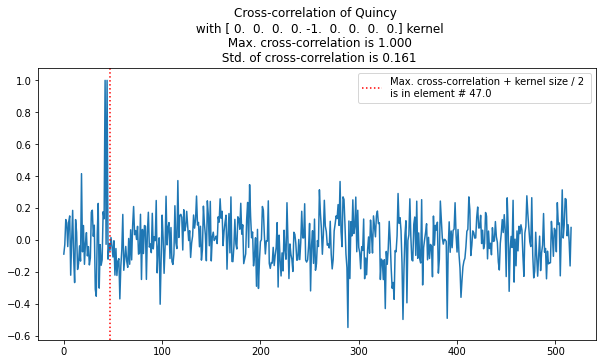

In [ ]:
# 414
a = np.zeros(4)
b = -np.ones(1)
kernel = np.concatenate((a,b,a), axis=None)

correlate = np.correlate(flux_norm-1, kernel, 'valid')

print(np.argmin(flux_norm)) # 115
print(np.argmax(correlate)+len(kernel)/2) # 115.5

size = (10, 5)
plt.figure(figsize=size)
plt.scatter(time, flux_norm-1, s=2)
plt.title('Normalized flux of Quincy vs Time')
plt.show()

plt.clf()
plt.figure(figsize=size)
plt.plot(correlate)
# plt.axvline(x=115, color='r', linestyle=':')
plt.axvline(x=np.argmax(correlate)+len(kernel)/2, color='r', linestyle=':',
              label='Max. cross-correlation + kernel size / 2 \nis in element # '\
              +str(np.argmax(correlate)+np.ceil(len(kernel)/2)))
plt.legend()
plt.title('Cross-correlation of Quincy \n with {} kernel'.format(kernel)+\
            '\n Max. cross-correlation is {:.3f}'.format(np.max(correlate))+\
            '\n Std. of cross-correlation is {:.3f}'.format(np.std(correlate)))
plt.show()

46
46.0


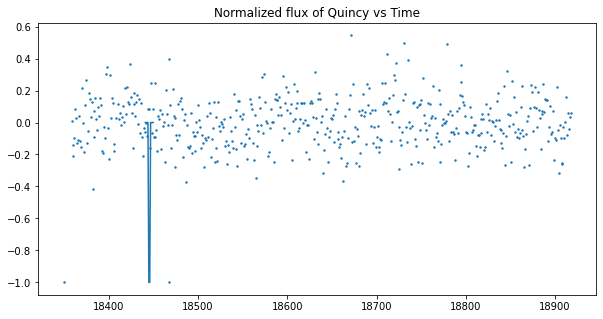

<Figure size 432x288 with 0 Axes>

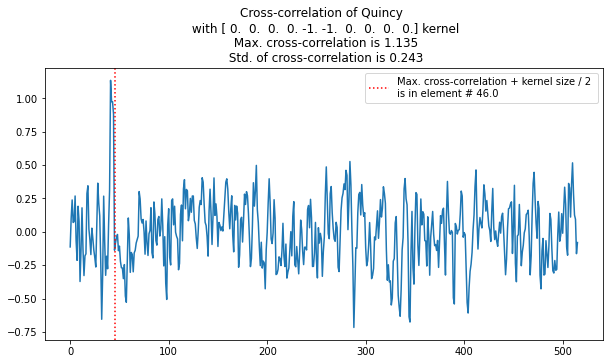

In [ ]:
# 424
a = np.zeros(4)
b = -np.ones(2)
kernel = np.concatenate((a,b,a), axis=None)
correlate = np.correlate(flux_norm-1, kernel, 'valid')

print(np.argmin(flux_norm)) # 115
print(np.argmax(correlate)+len(kernel)/2) # 115

size = (10, 5)
plt.figure(figsize=size)
plt.scatter(time, flux_norm-1, s=2)
x = np.array(list(range(len(kernel))))
pos_max = np.argmax(correlate)
x_shift = x + pos_max + 18400
plt.plot(x_shift, kernel)

plt.title('Normalized flux of Quincy vs Time')
plt.show()

plt.clf()
plt.figure(figsize=size)
plt.plot(correlate)
# plt.axvline(x=115, color='r', linestyle=':')
plt.axvline(x=np.argmax(correlate)+len(kernel)/2, color='r', linestyle=':',
              label='Max. cross-correlation + kernel size / 2 \nis in element # '\
              +str(np.argmax(correlate)+np.ceil(len(kernel)/2)))
plt.legend()
plt.title('Cross-correlation of Quincy \n with {} kernel'.format(kernel)+\
            '\n Max. cross-correlation is {:.3f}'.format(np.max(correlate))+\
            '\n Std. of cross-correlation is {:.3f}'.format(np.std(correlate)))
plt.show()

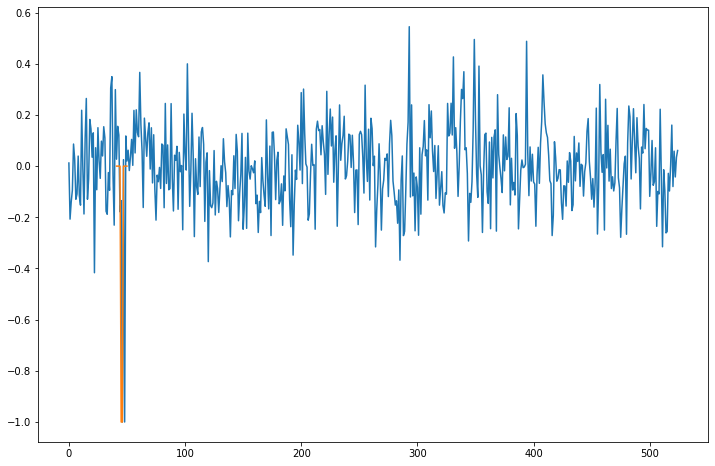

In [ ]:
x = np.array(list(range(len(kernel))))
pos_max = np.argmax(correlate)
x_shift = x + pos_max

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(flux_norm-1)
ax.plot(x_shift, kernel)

46
47.5


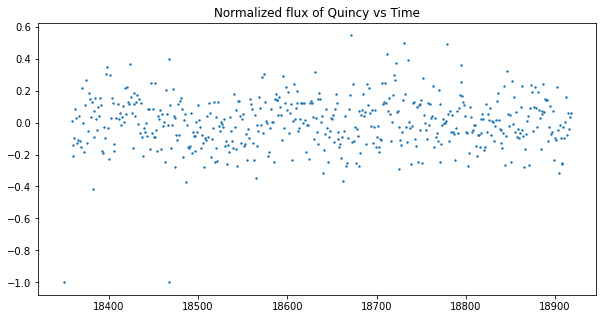

<Figure size 432x288 with 0 Axes>

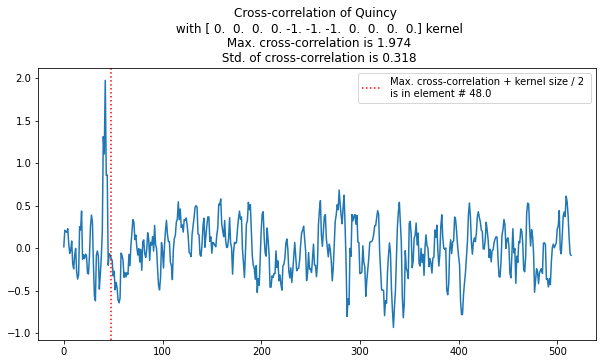

In [ ]:
# 434
a = np.zeros(4)
b = -np.ones(3)
kernel = np.concatenate((a,b,a), axis=None)
correlate = np.correlate(flux_norm-1, kernel, 'valid')

print(np.argmin(flux_norm)) # 115
print(np.argmax(correlate)+len(kernel)/2) # 114.5

size = (10, 5)
plt.figure(figsize=size)
plt.scatter(time, flux_norm-1, s=2)
plt.title('Normalized flux of Quincy vs Time')
plt.show()

plt.clf()
plt.figure(figsize=size)
plt.plot(correlate)
# plt.axvline(x=115, color='r', linestyle=':')
plt.axvline(x=np.argmax(correlate)+len(kernel)/2, color='r', linestyle=':',
              label='Max. cross-correlation + kernel size / 2 \nis in element # '\
              +str(np.argmax(correlate)+np.ceil(len(kernel)/2)))
plt.legend()
plt.title('Cross-correlation of Quincy \n with {} kernel'.format(kernel)+\
            '\n Max. cross-correlation is {:.3f}'.format(np.max(correlate))+\
            '\n Std. of cross-correlation is {:.3f}'.format(np.std(correlate)))
plt.legend()
plt.show()

46
47.0


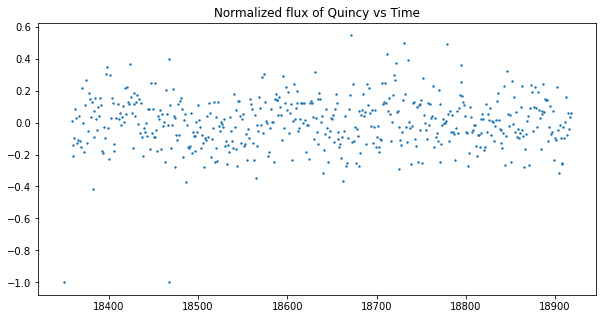

<Figure size 432x288 with 0 Axes>

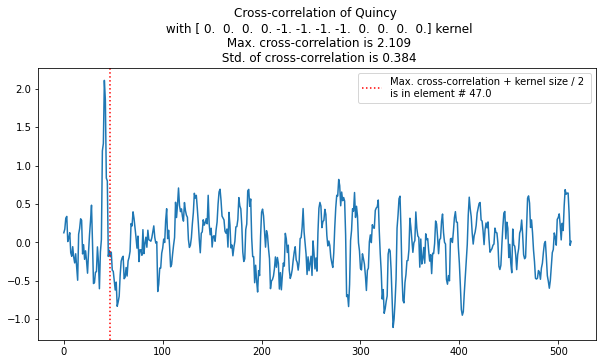

In [ ]:
# 444
a = np.zeros(4)
b = -np.ones(4)
kernel = np.concatenate((a,b,a), axis=None)

correlate = np.correlate(flux_norm-1, kernel, 'valid')

print(np.argmin(flux_norm)) # 115
print(np.argmax(correlate)+len(kernel)/2) # 114

size = (10, 5)
plt.figure(figsize=size)
plt.scatter(time, flux_norm-1, s=2)
plt.title('Normalized flux of Quincy vs Time')
plt.show()

plt.clf()
plt.figure(figsize=size)
plt.plot(correlate)
# plt.axvline(x=115, color='r', linestyle=':')
plt.axvline(x=np.argmax(correlate)+len(kernel)/2, color='r', linestyle=':',
              label='Max. cross-correlation + kernel size / 2 \nis in element # '\
              +str(np.argmax(correlate)+np.ceil(len(kernel)/2)))
plt.legend()
plt.title('Cross-correlation of Quincy \n with {} kernel'.format(kernel)+\
            '\n Max. cross-correlation is {:.3f}'.format(np.max(correlate))+\
            '\n Std. of cross-correlation is {:.3f}'.format(np.std(correlate)))
plt.show()

In [ ]:
# lc = np.array([0, 0, 0, -0.3, -0.3, 0, 0, 0])
lc = np.array([0, 0, 0, 0, -0.3, 0, 0, 0])
kernel = np.array([0, 0, 0, -1, -1, -1, 0, 0])
correlate = np.correlate(lc, kernel, 'valid')
correlate

array([0.3])

In [ ]:
# https://mail.google.com/mail/u/0/?tab=rm&ogbl#starred/QgrcJHrjCtFvDLGHjpjjqxngGMbGHZNfQgQ
# https://www.minorplanetcenter.net/iau/Sizes.html


# Por ejemplo, si la duración de la ocultación es de 0.1 s y el tiempo de
# exposición es de 0.05 s, entonces se usa un kernel de 2.

def size_kernel(diameter, velocity, exp_time):
  """
  Gives the size of the kernel that will be used in the cross-correlation. 
  It uses the data of the diameter and velocity of the asteroid, and the
  exposure time

  Inputs:
    diameter [float]: Diameter of the asteroid. It is in km. For example, with
                      respect to the TNO 14YY49, assuming that the albedo is 5%,
                      then the diameter is 55.2 km, and assuming that the albedo
                      is 30%, then the diameter is 22.5 km.
    
    velocity [float]: Velocity of the shadow of the asteroid. It is in km/s.
                      For example, the TNO 14YY49 moves 21.5 km/s on the sky 
                      relative to the star, or, 6.0 arcsec/hr.

    exp_time [float]: Exposure time. It is in seconds. It is the cadence of the 
                      detection or observation

  Output:
    kernel [int]:  Size of the kernel that will be used in the cross-correlation
                   It is the ratio between the duration of the occultation
                   (the ratio between the diameter and the velocity, which
                   is in seconds) and the exposure time.
  """
  duration = diameter / velocity
  kernel = round(duration / exp_time)
  return kernel

def SR(flux):
  """
  Calculates the signal-to-noise ratio of a flux.

  Input:
    flux [array]: Flux

  Output:
    SR [float]: Signal-to-noise ratio of the flux. Is the ratio between the mean
                of the flux, and the standard deviation of the flux.
  """
  SR = np.mean(flux) / np.std(flux)
  return SR

size_kernel(55.2, 21.5, 1) # round(2.56) == 3

3

In [ ]:
a = [1,2,3,4]
for i in range(len(a)-1, -1, -1):
  print(i, a[:i+1])

3 [1, 2, 3, 4]
2 [1, 2, 3]
1 [1, 2]
0 [1]


In [ ]:
for i in range(len(a)):
  print(i, a[i:])

0 [1, 2, 3, 4]
1 [2, 3, 4]
2 [3, 4]
3 [4]


In [ ]:
with open('20190128_Susanville_b.dat', 'r') as f:
# with open('test1.txt', 'r') as f:
  data = []
  d = f.readlines()
  for i in d:
    k = i.rstrip().split(",")
    data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]

# flux_norm = flux_norm[97:]
n = 2
distances = []
# compute distances between points
for i in range(len(time) - 1):
  dist = time[i] - time[i+1]
  distances.append(dist) 
# get the average
time_avg_sep = np.abs(sum(distances)) / len(distances)
window = 2 * round(time_avg_sep) + 1
# windowk = size_kernel(55.2, 21.5, time_avg_sep)
(rolling_mean_std_SR(flux_norm, wd_size=window)[2] < n), len(flux_norm)

for i in range(len(flux_norm)):
  if (rolling_mean_std_SR(flux_norm, wd_size=window)[2] < n)[i] == True:
    print(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


99
100
101
102
103
104
171
172
173
174
193
194
195
196
197
198
199
200
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


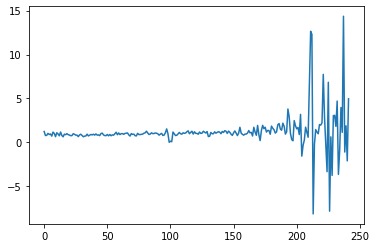

In [ ]:
plt.plot(flux_norm)

# obtener la posicion de un evento (max correlate/std correlate), y ver la SR alrededor de ese punto

In [ ]:
import pdb
def cut_right(flux, n):
  for i in range(len(flux)):
    print(i)
    if (rolling_mean_std_SR(flux[i:], wd_size=window)[2] < n).all():
      return flux[:i+1]

In [ ]:
n=2
(rolling_mean_std_SR(cut_right(flux_norm, 2), wd_size=window)[2] < n), len(cut_right(flux_norm, n))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars



184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223


(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [ ]:
n=2
def cut_left(flux, n):
  for i in range(len(flux)-1, -1, -1):
    if (rolling_mean_std_SR(flux[:i+1], wd_size=window)[2] < n).all():
      return flux[:i+1]

(rolling_mean_std_SR(cut_left(flux_norm, 2), wd_size=window)[2] < n), len(cut_left(flux_norm, n))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


TypeError: ignored

In [ ]:
SR_less_than = []
possible_detection = []
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
  # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
  a = np.zeros(4)
  b = - np.ones(size_kernel(55.2, 21.5, time_avg_sep))
  kernel = np.concatenate((a, b, a), axis=None)
  correlate = np.correlate(flux_norm-1, kernel, 'valid')
  n = 2
  window = 2 * round(time_avg_sep) + 1
  # if (rolling_mean_std_SR(flux_norm, wd_size=window)[2] < n).any():
  #   print('SR < '+str(n)+' in '+str(file)[9:-4]+' location')
  #   SR_less_than.append(str(file)[9:-4])
  # if np.max(correlate) > 5 * np.std(correlate) and (rolling_mean_std_SR(flux_norm, wd_size=window)[2] > n).all():
  if np.max(correlate) > 5 * np.std(correlate) and (rolling_mean_std_SR(cut_right(flux_norm, n), wd_size=window)[2] > n).all():
    # print('Posible detection in '+str(file)[9:-4]+\
    #       ' location, magnitude of maximum cross-correlation / std of cross-correlation is {:.3f}'\
    #       .format(np.max(correlate) / np.std(correlate)))
    # print('Magnitude of maximum cross-correlation at '+str(file)[9:-4]+' is {:.3f}'.format(np.max(correlate)))
    # print('SR at '+str(file)[9:-4]+' is {:.3f}'.format(SR(flux_norm)))
    possible_detection.append(str(file)[9:-4])
SR_less_than, possible_detection

In [ ]:
from scipy.stats import norm 
with open('20190128_Quincy_b.dat', 'r') as f:
  data = []
  d = f.readlines()
  for i in d:
    k = i.rstrip().split(",")
    data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]

list_ratio = []
for i in range(1, 10):
  a = np.zeros(4)
  b = -np.ones(i)
  kernel = np.concatenate((a,b,a), axis=None)
  correlate = np.correlate(flux_norm-1, kernel, 'valid')
  list_ratio.append(np.max(correlate) / np.std(correlate))

plt.plot(range(1, 10), list_ratio)
plt.title('Magnitude of maximum cross-correlation / std. of cross-correlation \nvs duration of the event at Quincy_b \n with 4 ceros on the left and on the right')
plt.xlabel('Units')

In [ ]:
list_scalar = []
for i in np.linspace(0.1, 1, 10):
  a = np.zeros(4)
  b = -i*np.ones(3)
  kernel = np.concatenate((a,b,a), axis=None)
  correlate = np.correlate(flux_norm-1, kernel, 'valid')
  list_scalar.append(np.max(correlate) / np.std(correlate))
  print(i, np.argmax(correlate))

plt.clf()
plt.plot(list_scalar)
plt.title('Magnitude of maximum cross-correlation / std. of cross-correlation \n vs scalar at Quincy_b')
plt.show()

In [ ]:
list_ceros = []
for i in range(1, 10):
  a = np.zeros(i)
  b = -np.ones(3)
  kernel = np.concatenate((a,b,a), axis=None)
  correlate = np.correlate(flux_norm-1, kernel, 'valid')
  list_ceros.append(np.max(correlate) / np.std(correlate))

plt.plot(range(1, 10), list_ceros)
plt.title('Magnitude of maximum cross-correlation / std. of cross-correlation \n vs number of ceros on the left and  on the right, at Quincy_b \n with 3 -1s')

In [ ]:
# https://docs.astropy.org/en/stable/api/astropy.stats.sigma_clipping.sigma_clip.html
from astropy.stats import sigma_clip
import numpy as np
from numpy import mean
with open('20190128_Quincy.dat', 'r') as f:
  data = []
  d = f.readlines()
  for i in d:
    k = i.rstrip().split(",")
    data.append([float(i) for i in k])
  data = np.array(data, dtype='float')
  time = data[:, 0]
  flux_norm = data[:, 1]
  flux_unc = data[:, 2]

# astropy.stats.sigma_clip(data, sigma=3, sigma_lower=None, sigma_upper=None,
#                          maxiters=5, cenfunc='median', stdfunc='std', axis=None,
#                          masked=True, return_bounds=False, copy=True, grow=False)

filtered_data = sigma_clip(flux_norm, sigma=3, maxiters=None, cenfunc=mean, masked=False, copy=False)

# plt.scatter(time, filtered_data, s=2)

plt.plot(filtered_data-1, label='3 sigma-clipped')
# plt.plot(flux_norm-1, label='normalized flux')
plt.legend()